In [1]:
import torch
fake=torch.load("final_fake_data_epoch_0217_3000.pt")
real=torch.load("real_data_0213.pt")

C:\Users\A\AppData\Local\Temp\ipykernel_3380\3777373986.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fake=torch.load("final_fake_data_epoch_0217_3000.pt")
C:\Users\A\

In [2]:
print(fake.shape)
print(real.shape)

(1000, 5, 200)
torch.Size([10000, 5, 200])


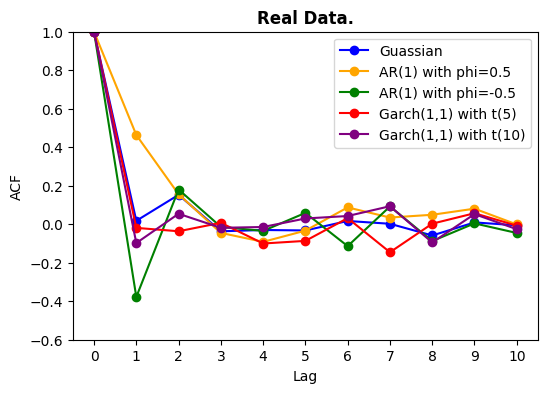

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf


# ✅ (5,100) 데이터 중 하나 샘플링 (랜덤 선택)
sample_index_real = 489
sample_data_real= real[sample_index_real]  # (5,100)
sample_data_real=sample_data_real.cpu().numpy()
# ✅ ACF 계산 (각 행별로)
lags = 10
acf_values_list = [acf(sample_data_real[i], nlags=lags, fft=True) for i in range(5)]

# ✅ ACF 그래프 출력 (5개 분포를 한 플롯에 표시)
plt.figure(figsize=(6, 4))
colors = ["blue", "orange", "green", "red", "purple"]
labels = ["Guassian", "AR(1) with phi=0.5", "AR(1) with phi=-0.5", "Garch(1,1) with t(5)", "Garch(1,1) with t(10)"]

for i in range(5):
    plt.plot(range(lags + 1), acf_values_list[i], marker="o", linestyle="-", color=colors[i], label=labels[i])

# ✅ 그래프 스타일 적용 (첨부된 사진과 유사하게 설정)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.xticks(range(lags + 1))
plt.ylim([-0.6, 1])
plt.title("Real Data.", fontsize=12, fontweight="bold")

# ✅ 범례 추가 (5개 분포 표시)
plt.legend(loc="upper right")

# ✅ 그래프 표시
plt.show()


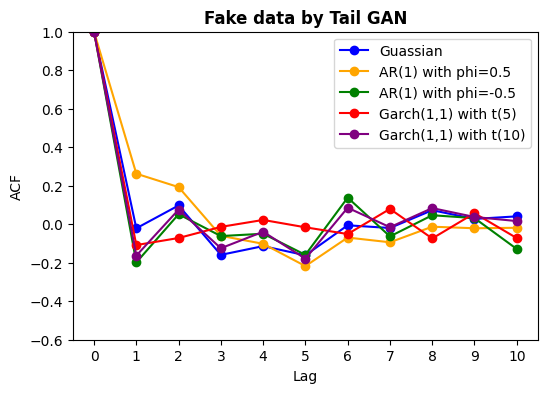

In [4]:
sample_index_fake =442
sample_data_fake = fake[sample_index_fake]  # (5,100)

# ✅ ACF 계산 (각 행별로)
lags = 10
acf_values_list = [acf(sample_data_fake[i], nlags=lags, fft=True) for i in range(5)]

# ✅ ACF 그래프 출력 (5개 분포를 한 플롯에 표시)
plt.figure(figsize=(6, 4))
colors = ["blue", "orange", "green", "red", "purple"]
labels = ["Guassian", "AR(1) with phi=0.5", "AR(1) with phi=-0.5", "Garch(1,1) with t(5)", "Garch(1,1) with t(10)"]

for i in range(5):
    plt.plot(range(lags + 1), acf_values_list[i], marker="o", linestyle="-", color=colors[i], label=labels[i])

# ✅ 그래프 스타일 적용 (첨부된 사진과 유사하게 설정)
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.xticks(range(lags + 1))
plt.ylim([-0.6, 1])
plt.title("Fake data by Tail GAN", fontsize=12, fontweight="bold")

# ✅ 범례 추가 (5개 분포 표시)
plt.legend(loc="upper right")

# ✅ 그래프 표시
plt.show()

Guassian 분포 비교

   [Shapiro-Wilk Test] Real Data: stat=0.9917, p=0.3088
   [Shapiro-Wilk Test] Fake Data: stat=0.9951, p=0.7590


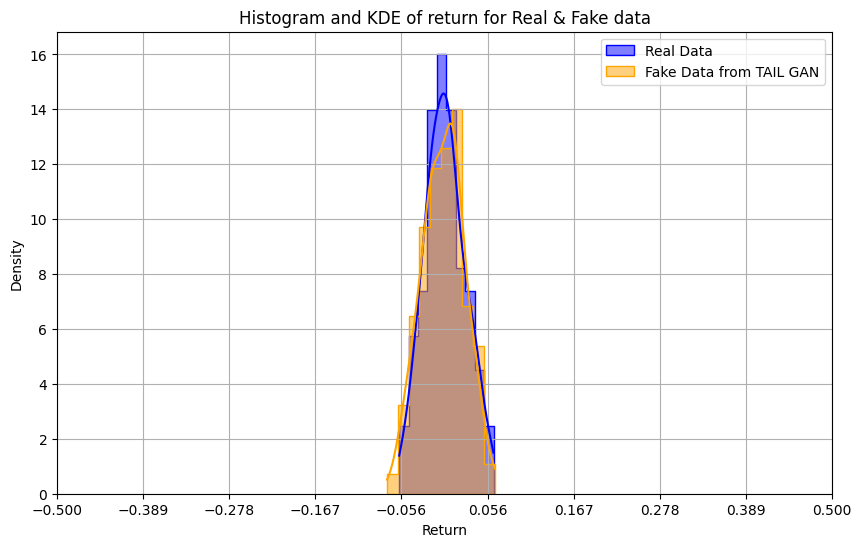

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

portfolio_index_Gussian_1 = 489
portfolio_index_Gussian_2 = 442
index_Gaussian=0

# 데이터 준비
real_return_Gaussian = real[portfolio_index_Gussian_1, index_Gaussian, :]
real_return_Gaussian=real_return_Gaussian.cpu().numpy()
fake_return_Gaussian = fake[portfolio_index_Gussian_2, index_Gaussian, :]

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# ✅ 예제 데이터 (정규분포 & 비정규분포)
normal_real = real_return_Gaussian
normal_fake = fake_return_Gaussian  

# ✅ 1. Shapiro-Wilk Test (p-value 확인)
shapiro_test_real = stats.shapiro(normal_real)
shapiro_test_fake = stats.shapiro(normal_fake)

print(f"   [Shapiro-Wilk Test] Real Data: stat={shapiro_test_real.statistic:.4f}, p={shapiro_test_real.pvalue:.4f}")
print(f"   [Shapiro-Wilk Test] Fake Data: stat={shapiro_test_fake.statistic:.4f}, p={shapiro_test_fake.pvalue:.4f}")

plt.figure(figsize=(10, 6))
sns.histplot(normal_real, bins=10, kde=True, color="blue", label="Real Data", stat="density", element="step", alpha=0.5)
sns.histplot(normal_fake, bins=10, kde=True, color="orange", label="Fake Data from TAIL GAN", stat="density", element="step", alpha=0.5)

# 그래프 설정
plt.xlabel("Return")
plt.ylabel("Density")
plt.title(f"Histogram and KDE of return for Real & Fake data")
plt.legend()
plt.grid(True)

# ✅ x축 간격을 더 좁게 설정
plt.xticks(ticks=np.linspace(-0.5, 0.5, 10))  # -1부터 1까지 21개의 눈금 생성
plt.xlim(-0.5, 0.5)  # x축 범위 설정

# 출력
plt.show()


AR(1) with phi>0 모델 검증

1.  acf와 pacf plot
2. adf test로 stationary한지 검증
3. phi 출력해서 확인

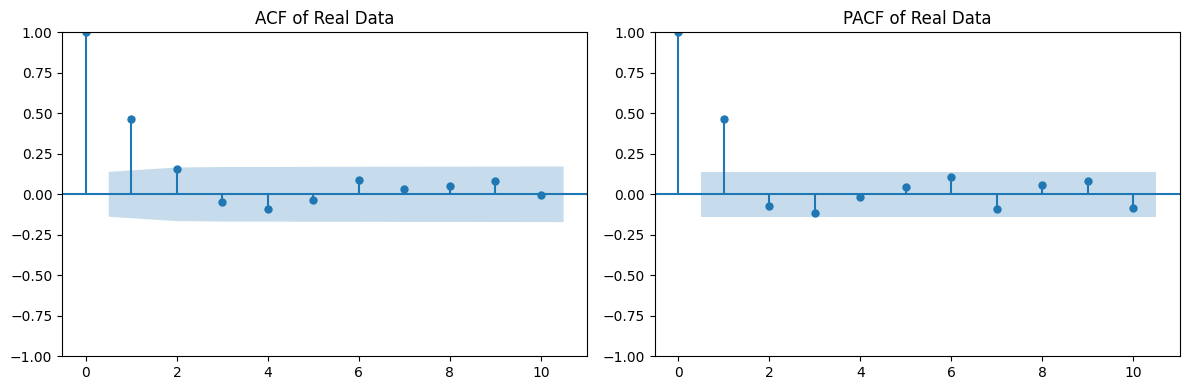

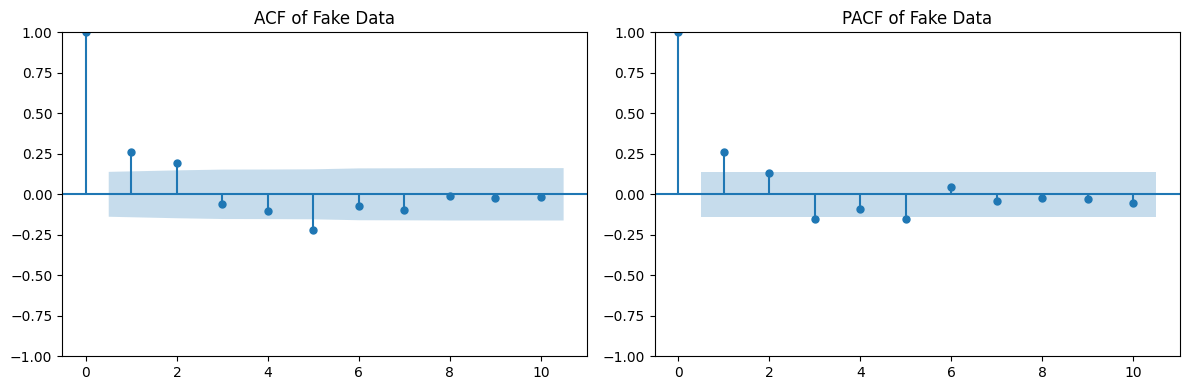

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

portfolio_index_fake = 442
portfolio_index_real= 489
index_AR_P=1


# 데이터 준비
real_return_AR_P = real[portfolio_index_real, index_AR_P, :]
real_return_AR_P=real_return_AR_P.cpu().numpy()
fake_return_AR_P = fake[portfolio_index_fake, index_AR_P, :]



# ACF와 PACF를 계산 및 시각화하는 함수 정의
def plot_acf_pacf(data, title="ACF and PACF"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # ACF
    plot_acf(data, ax=axes[0], lags=10)
    axes[0].set_title(f"ACF {title}")
    
    # PACF
    plot_pacf(data, ax=axes[1], lags=10)
    axes[1].set_title(f"PACF {title}")
    
    plt.tight_layout()
    plt.show()

# real_pnl과 fake_pnl 데이터에 대해 ACF & PACF 그리기
plot_acf_pacf(real_return_AR_P, title="of Real Data")
plot_acf_pacf(fake_return_AR_P, title="of Fake Data")


In [7]:
from statsmodels.tsa.stattools import acf, pacf, adfuller

def adf_test(series, title="Data"):
    result = adfuller(series)
    print(f"--- ADF Test for {title} ---")
    print(f"ADF Statistic: {result[0]: .4f}")
    print(f"p-value: {result[1]: .4f}")
    print("Critical value:")
    for key, value in result[4].items():
        print(f"  {key}: {value:.4f}")
    if result[1] <= 0.05:
        print(f"{title} is STATIONARY (p-value <= 0.05)\n")
    else:
        print(f"{title} is NON-STATIONARY (p-value > 0.05)\n")
        
adf_test(real_return_AR_P, title="Real Data")
adf_test(fake_return_AR_P, title="Fake Data")


--- ADF Test for Real Data ---
ADF Statistic: -8.4730
p-value:  0.0000
Critical value:
  1%: -3.4636
  5%: -2.8762
  10%: -2.5746
Real Data is STATIONARY (p-value <= 0.05)

--- ADF Test for Fake Data ---
ADF Statistic: -7.4172
p-value:  0.0000
Critical value:
  1%: -3.4638
  5%: -2.8763
  10%: -2.5746
Fake Data is STATIONARY (p-value <= 0.05)



In [8]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# ✅ AR(1) 모델 적합
model_real_AR_P = AutoReg(real_return_AR_P, lags=1)  # Lag=1 → AR(1) 모델 적용
result_real_AR_p = model_real_AR_P.fit()

# ✅ AR(1) 계수(𝜙) 출력
phi_real_AR_p = result_real_AR_p.params[1]  # AR(1) 계수 (1번 인덱스)
intercept_real_AR_p = result_real_AR_p.params[0]  # 절편 (0번 인덱스)

print(f"AR(1) 계수 (𝜙): {phi_real_AR_p:.4f}")
print(f"절편 (Intercept): {intercept_real_AR_p:.4f}")

# ✅ 모델 요약 정보 출력
print(result_real_AR_p.summary())

# ✅ Ljung-Box 검정 수행 (잔차가 백색잡음인지 확인)
residuals = result_real_AR_p.resid  # 모델의 잔차 추출
ljung_box_results = acorr_ljungbox(residuals, lags=10, return_df=True)

# ✅ Ljung-Box 검정 결과 출력
print("\n🔹 Ljung-Box Statistics:")
print(ljung_box_results)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n p_value > 0.05: The residuals are likely to be white noise \n → The model is likely to be appropriate")
else:
    print("\n❌ 잔차가 백색잡음이 아닐 가능성이 높음 → 더 높은 차수의 AR 모델이 필요할 수 있음!")


AR(1) 계수 (𝜙): 0.4646
절편 (Intercept): 0.0003
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                 508.484
Method:               Conditional MLE   S.D. of innovations              0.019
Date:                Mon, 24 Feb 2025   AIC                          -1010.967
Time:                        10:48:18   BIC                          -1001.087
Sample:                             1   HQIC                         -1006.969
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.260      0.795      -0.002       0.003
y.L1           0.4646      0.063      7.390      0.000       0.341       0.588
        

In [9]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

# ✅ AR(1) 모델 적합
model_fake_AR_p = AutoReg(fake_return_AR_P, lags=1)  # Lag=1 → AR(1) 모델 적용
result_fake_AR_p = model_fake_AR_p.fit()

# ✅ AR(1) 계수(𝜙) 출력
phi_fake_AR_p = result_fake_AR_p.params[1]  # AR(1) 계수 (1번 인덱스)
intercept_fake_AR_p = result_fake_AR_p.params[0]  # 절편 (0번 인덱스)

print(f"AR(1) 계수 (𝜙): {phi_fake_AR_p:.4f}")
print(f"절편 (Intercept): {intercept_fake_AR_p:.4f}")

# ✅ 모델 요약 정보 출력
print(result_fake_AR_p.summary())

# ✅ Ljung-Box 검정 수행 (잔차가 백색잡음인지 확인)
residuals = result_fake_AR_p.resid  # 모델의 잔차 추출
ljung_box_results = acorr_ljungbox(residuals, lags=10, return_df=True)

# ✅ Ljung-Box 검정 결과 출력
print("\n🔹 Ljung-Box Statistics:")
print(ljung_box_results)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n p_value > 0.05: The residuals are likely to be white noise \n → The model is likely to be appropriate")
else:
    print("\n❌ 잔차가 백색잡음이 아닐 가능성이 높음 → 더 높은 차수의 AR 모델이 필요할 수 있음!")

AR(1) 계수 (𝜙): 0.2625
절편 (Intercept): 0.0017
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                 381.111
Method:               Conditional MLE   S.D. of innovations              0.036
Date:                Mon, 24 Feb 2025   AIC                           -756.222
Time:                        10:48:55   BIC                           -746.342
Sample:                             1   HQIC                          -752.224
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.003      0.652      0.514      -0.003       0.007
y.L1           0.2625      0.068      3.843      0.000       0.129       0.396
        

In [10]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# ✅ AR(2) 모델 적합
model_fake_AR_p = AutoReg(fake_return_AR_P, lags=2)  # Lag=2 → AR(2) 모델 적용
result_fake_AR_p = model_fake_AR_p.fit()

# ✅ AR(2) 계수(𝜙1, 𝜙2) 및 절편 출력
intercept_fake_AR_p = result_fake_AR_p.params[0]  # 절편 (0번 인덱스)
phi1_fake_AR_p = result_fake_AR_p.params[1]  # AR(1) 계수 (1번 인덱스)
phi2_fake_AR_p = result_fake_AR_p.params[2]  # AR(2) 계수 (2번 인덱스)

print(f"AR(1) 계수 (𝜙1): {phi1_fake_AR_p:.4f}")
print(f"AR(2) 계수 (𝜙2): {phi2_fake_AR_p:.4f}")
print(f"절편 (Intercept): {intercept_fake_AR_p:.4f}")

# ✅ 모델 요약 정보 출력
print(result_fake_AR_p.summary())

# ✅ Ljung-Box 검정 수행 (잔차가 백색잡음인지 확인)
residuals = result_fake_AR_p.resid  # 모델의 잔차 추출
ljung_box_results = acorr_ljungbox(residuals, lags=10, return_df=True)

# ✅ Ljung-Box 검정 결과 출력
print("\n🔹 Ljung-Box Statistics:")
print(ljung_box_results)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n✅ p-value > 0.05: The residuals are likely to be white noise")
    print("→ The AR(2) model is likely to be appropriate ✅")
else:
    print("\n❌ p-value ≤ 0.05: The residuals are NOT white noise")
    print("→ A higher-order AR model might be needed ❌")


AR(1) 계수 (𝜙1): 0.2278
AR(2) 계수 (𝜙2): 0.1333
절편 (Intercept): 0.0014
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(2)   Log Likelihood                 380.480
Method:               Conditional MLE   S.D. of innovations              0.035
Date:                Mon, 24 Feb 2025   AIC                           -752.959
Time:                        10:48:58   BIC                           -739.806
Sample:                             2   HQIC                          -747.635
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.003      0.572      0.567      -0.004       0.006
y.L1           0.2278      0.070      3.233      0.001       0.0

In [11]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# ✅ AR(3) 모델 적합
model_fake_AR_p = AutoReg(fake_return_AR_P, lags=3)  # Lag=3 → AR(3) 모델 적용
result_fake_AR_p = model_fake_AR_p.fit()

# ✅ AR(3) 계수(𝜙1, 𝜙2, 𝜙3) 및 절편 출력
intercept_fake_AR_p = result_fake_AR_p.params[0]  # 절편 (0번 인덱스)
phi1_fake_AR_p = result_fake_AR_p.params[1]  # AR(1) 계수 (1번 인덱스)
phi2_fake_AR_p = result_fake_AR_p.params[2]  # AR(2) 계수 (2번 인덱스)
phi3_fake_AR_p = result_fake_AR_p.params[3]  # AR(3) 계수 (3번 인덱스)

print(f"AR(1) 계수 (𝜙1): {phi1_fake_AR_p:.4f}")
print(f"AR(2) 계수 (𝜙2): {phi2_fake_AR_p:.4f}")
print(f"AR(3) 계수 (𝜙3): {phi3_fake_AR_p:.4f}")
print(f"절편 (Intercept): {intercept_fake_AR_p:.4f}")

# ✅ 모델 요약 정보 출력
print(result_fake_AR_p.summary())

# ✅ Ljung-Box 검정 수행 (잔차가 백색잡음인지 확인)
residuals = result_fake_AR_p.resid  # 모델의 잔차 추출
ljung_box_results = acorr_ljungbox(residuals, lags=10, return_df=True)

# ✅ Ljung-Box 검정 결과 출력
print("\n🔹 Ljung-Box Statistics:")
print(ljung_box_results)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n p-value > 0.05: The residuals are likely to be white noise")
    print("→ The AR(3) model is likely to be appropriate")
else:
    print("\n❌ p-value ≤ 0.05: The residuals are NOT white noise")
    print("→ A higher-order AR model might be needed ❌")


AR(1) 계수 (𝜙1): 0.2489
AR(2) 계수 (𝜙2): 0.1662
AR(3) 계수 (𝜙3): -0.1534
절편 (Intercept): 0.0017
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(3)   Log Likelihood                 380.456
Method:               Conditional MLE   S.D. of innovations              0.035
Date:                Mon, 24 Feb 2025   AIC                           -750.912
Time:                        10:49:01   BIC                           -734.496
Sample:                             3   HQIC                          -744.267
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.003      0.661      0.508      -0.003       0.007
y.L1           0.2489      0.070      3.5

But p-value of 3rd lag is over than 0.05 so that AR(3) is not a appropriate model.

Therefore, We can conclude that fake data is AR(2) model with positive phi.

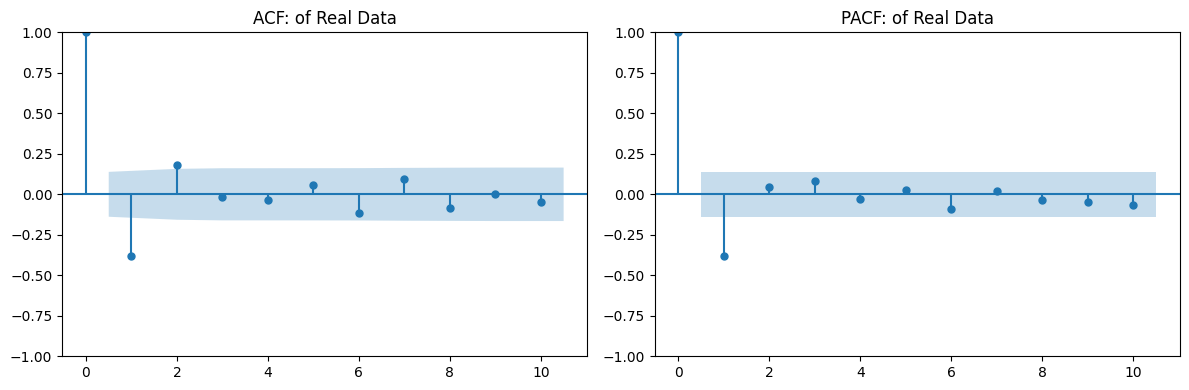

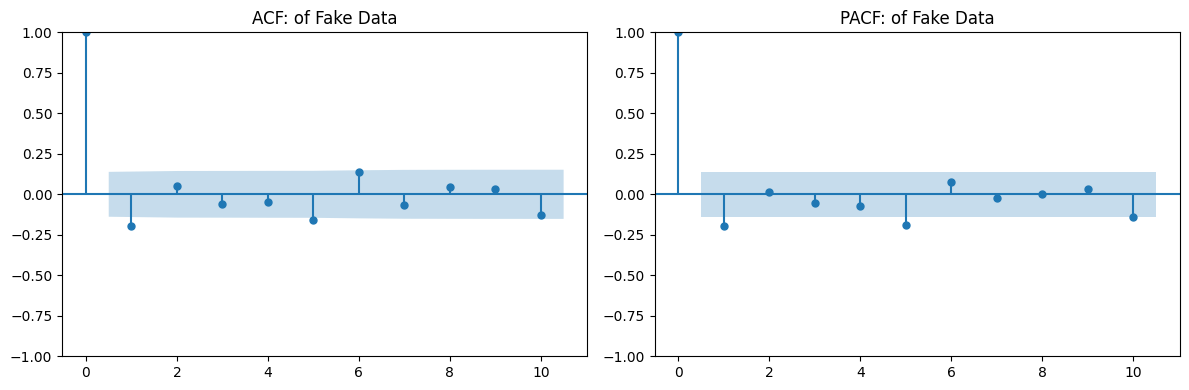

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

portfolio_index_AR_N_real = 489
portfolio_index_AR_N_fake = 442
index_AR_N=2


# 데이터 준비
real_return_AR_N = real[portfolio_index_AR_N_real, index_AR_N, :]
real_return_AR_N=real_return_AR_N.cpu().numpy()
fake_return_AR_N = fake[portfolio_index_AR_N_fake, index_AR_N, :]



# ACF와 PACF를 계산 및 시각화하는 함수 정의
def plot_acf_pacf(data, title="ACF and PACF"):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # ACF
    plot_acf(data, ax=axes[0], lags=10)
    axes[0].set_title(f"ACF: {title}")
    
    # PACF
    plot_pacf(data, ax=axes[1], lags=10)
    axes[1].set_title(f"PACF: {title}")
    
    plt.tight_layout()
    plt.show()

# real_pnl과 fake_pnl 데이터에 대해 ACF & PACF 그리기
plot_acf_pacf(real_return_AR_N, title="of Real Data")
plot_acf_pacf(fake_return_AR_N, title="of Fake Data")


In [13]:
from statsmodels.tsa.stattools import acf, pacf, adfuller

def adf_test(series, title="Data"):
    result = adfuller(series)
    print(f"--- ADF Test for {title} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]: .4f}")
    print("Critical value:")
    for key, value in result[4].items():
        print(f"  {key}: {value:.4f}")
    if result[1] <= 0.05:
        print(f"{title} is STATIONARY (p-value <= 0.05)\n")
    else:
        print(f"{title} is NON-STATIONARY (p-value > 0.05)\n")
        
adf_test(real_return_AR_N, title="Real Data")
adf_test(fake_return_AR_N, title="Fake Data")


--- ADF Test for Real Data ---
ADF Statistic: -20.8845
p-value:  0.0000
Critical value:
  1%: -3.4636
  5%: -2.8762
  10%: -2.5746
Real Data is STATIONARY (p-value <= 0.05)

--- ADF Test for Fake Data ---
ADF Statistic: -4.3082
p-value:  0.0004
Critical value:
  1%: -3.4654
  5%: -2.8770
  10%: -2.5750
Fake Data is STATIONARY (p-value <= 0.05)



In [14]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# ✅ AR(1) 모델 적합
model_2 = AutoReg(real_return_AR_N, lags=1)  # Lag=1 → AR(1) 모델 적용
result_2 = model_2.fit()

# ✅ AR(1) 계수(𝜙) 출력
phi_2= result_2.params[1]  # AR(1) 계수 (1번 인덱스)
intercept_2 = result_2.params[0]  # 절편 (0번 인덱스)

print(f"AR(1) 계수 (𝜙): {phi_2:.4f}")
print(f"절편 (Intercept): {intercept_2:.4f}")

# ✅ 모델 요약 정보 출력
print(result_2.summary())

# ✅ Ljung-Box 검정 수행
residuals = result_2.resid  # 모델의 잔차 가져오기
lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)  # lag=10까지 검사

print("\n🔍 Ljung-Box Test Statistics:")
print(lb_test)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n p_value > 0.05: The residuals are likely to be white noise \n → The model is likely to be appropriate")
else:
    print("\n❌ 잔차가 백색잡음이 아닐 가능성이 높음 → 더 높은 차수의 AR 모델이 필요할 수 있음!")


AR(1) 계수 (𝜙): -0.3787
절편 (Intercept): 0.0005
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                 448.814
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Mon, 24 Feb 2025   AIC                           -891.627
Time:                        10:49:09   BIC                           -881.747
Sample:                             1   HQIC                          -887.628
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.002      0.266      0.790      -0.003       0.004
y.L1          -0.3787      0.066     -5.766      0.000      -0.507      -0.250
       

In [15]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# ✅ AR(1) 모델 적합
model_2_fake = AutoReg(fake_return_AR_N, lags=1)  # Lag=1 → AR(1) 모델 적용
result_2_fake = model_2_fake.fit()

# ✅ AR(1) 계수(𝜙) 출력
phi_2_fake= result_2_fake.params[1]  # AR(1) 계수 (1번 인덱스)
intercept_2_fake = result_2_fake.params[0]  # 절편 (0번 인덱스)

print(f"AR(1) 계수 (𝜙): {phi_2_fake:.4f}")
print(f"절편 (Intercept): {intercept_2_fake:.4f}")

# ✅ 모델 요약 정보 출력
print(result_2_fake.summary())

# ✅ Ljung-Box 검정 수행
residuals = result_2_fake.resid  # 모델의 잔차 가져오기
lb_test = acorr_ljungbox(residuals, lags=10, return_df=True)  # lag=10까지 검사

print("\n🔍 Ljung-Box Test Statistics:")
print(lb_test)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n p_value > 0.05: The residuals are likely to be white noise \n → The model is likely to be appropriate")
else:
    print("\n❌ 잔차가 백색잡음이 아닐 가능성이 높음 → 더 높은 차수의 AR 모델이 필요할 수 있음!")


AR(1) 계수 (𝜙): -0.2000
절편 (Intercept): 0.0015
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(1)   Log Likelihood                 455.220
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Mon, 24 Feb 2025   AIC                           -904.441
Time:                        10:49:12   BIC                           -894.561
Sample:                             1   HQIC                          -900.442
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.002      0.856      0.392      -0.002       0.005
y.L1          -0.2000      0.069     -2.887      0.004      -0.336      -0.064
       

In [16]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox

# ✅ AR(2) 모델 적합
model_2_fake = AutoReg(fake_return_AR_N, lags=2)  # Lag=2 → AR(2) 모델 적용
result_2_fake = model_2_fake.fit()

# ✅ AR(2) 계수(𝜙1, 𝜙2) 및 절편 출력
intercept_2_fake = result_2_fake.params[0]  # 절편 (0번 인덱스)
phi1_2_fake = result_2_fake.params[1]  # AR(1) 계수 (1번 인덱스)
phi2_2_fake = result_2_fake.params[2]  # AR(2) 계수 (2번 인덱스)

print(f"AR(1) 계수 (𝜙1): {phi1_2_fake:.4f}")
print(f"AR(2) 계수 (𝜙2): {phi2_2_fake:.4f}")
print(f"절편 (Intercept): {intercept_2_fake:.4f}")

# ✅ 모델 요약 정보 출력
print(result_2_fake.summary())

# ✅ Ljung-Box 검정 수행 (잔차가 백색잡음인지 확인)
residuals = result_2_fake.resid  # 모델의 잔차 가져오기
ljung_box_results = acorr_ljungbox(residuals, lags=10, return_df=True)  # lag=10까지 검사

# ✅ Ljung-Box 검정 결과 출력
print("\n🔍 Ljung-Box Test Statistics:")
print(ljung_box_results)

# ✅ 해석
p_value = ljung_box_results["lb_pvalue"].values[0]  # p-value 추출
if p_value > 0.05:
    print("\n✅ p-value > 0.05: The residuals are likely to be white noise")
    print("→ The AR(2) model is likely to be appropriate ✅")
else:
    print("\n❌ p-value ≤ 0.05: The residuals are NOT white noise")
    print("→ A higher-order AR model might be needed ❌")


AR(1) 계수 (𝜙1): -0.2038
AR(2) 계수 (𝜙2): 0.0110
절편 (Intercept): 0.0014
                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  200
Model:                     AutoReg(2)   Log Likelihood                 452.749
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Mon, 24 Feb 2025   AIC                           -897.498
Time:                        10:49:15   BIC                           -884.345
Sample:                             2   HQIC                          -892.174
                                  200                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0014      0.002      0.789      0.430      -0.002       0.005
y.L1          -0.2038      0.071     -2.859      0.004      -0.

p-value of 2nd lag is over than 0.05 so that AR(2) is not a appropriate model.
We can conclude that fake data is AR(1) model with negative phi.

In [80]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch



portfolio_index_garch_5_real = 489
portfolio_index_garch_5_fake = 442
index_AR_N=3


# 데이터 준비
real_return_garch_df_5 = real[portfolio_index_garch_5_real, index_AR_N, :]
real_return_garch_df_5= real_return_garch_df_5.cpu().numpy()
fake_return_garch_df_5 = fake[portfolio_index_garch_5_fake, index_AR_N, :]

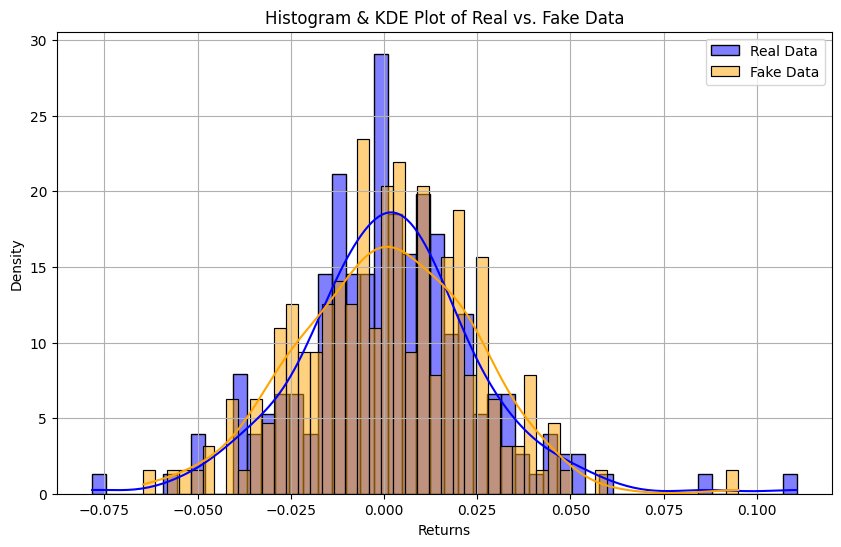

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비 (예제 데이터)
real_returns = real_return_garch_df_5  # 실제 데이터
fake_returns = fake_return_garch_df_5  # 생성된 데이터

# 히스토그램 및 KDE 플롯
plt.figure(figsize=(10, 6))

# Real Data
sns.histplot(real_returns, kde=True, bins=50, label="Real Data", color="blue", alpha=0.5, stat="density")

# Fake Data
sns.histplot(fake_returns, kde=True, bins=50, label="Fake Data", color="orange", alpha=0.5, stat="density")

# 그래프 설정
plt.title("Histogram & KDE Plot of Real vs. Fake Data")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()


c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005778. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



### Real Data - GARCH(1,1) 결과 ###
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                469.343
Distribution:      Standardized Student's t   AIC:                          -928.686
Method:                  Maximum Likelihood   BIC:                          -912.195
                                              No. Observations:                  200
Date:                      Mon, Feb 24 2025   Df Residuals:                      199
Time:                              14:11:56   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------------

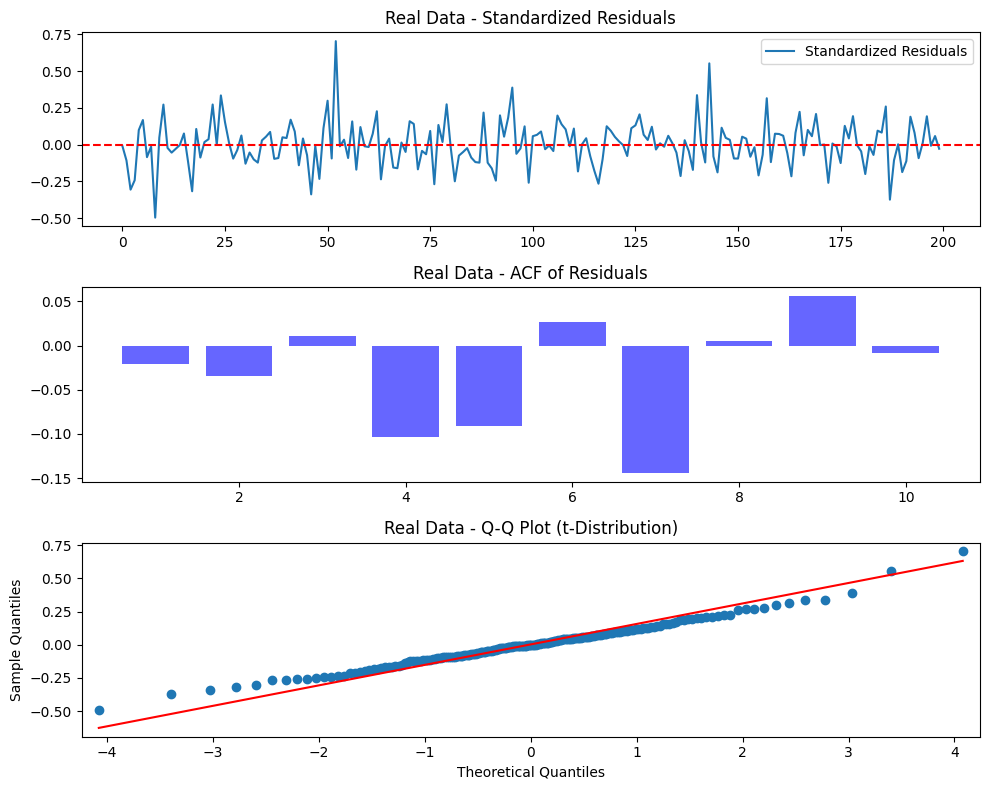


### Fake Data - 잔차 분석 (t-분포 검정) ###
추정된 자유도 (df): 27.2177
Cramér–von Mises Test (t-분포 자유도=27.217679709238908): stat=10.6240, p-value=0.0000
K-S Test (t-분포 자유도=3): stat=0.0612, p-value=0.4256
K-S Test (t-분포 자유도=5): stat=0.0440, p-value=0.8162
K-S Test (t-분포 자유도=10): stat=0.0311, p-value=0.9873
K-S Test (t-분포 자유도=30): stat=0.0348, p-value=0.9618
K-S Test (t-분포 적합성 검정): stat=0.0345, p-value=0.9646
K-S Test (Cauchy 분포): stat=0.3948, p-value=0.0000
K-S Test (GED 분포): stat=0.0328, p-value=0.9775
추정된 GED shape parameter: 1.8739
Ljung-Box Q-stat p-values (첫 10개): [0.1254834  0.21509354 0.36582589 0.52020519 0.66293018 0.71276165
 0.66068398 0.61811227 0.64077502 0.60744382]
ARCH Test: stat=9.2075, p-value=0.5125
Shapiro-Wilk Test: stat=0.9943, p-value=0.6431
Jarque-Bera Test: stat=1.1972, p-value=0.5496
Skewness: 0.0852, Kurtosis: 3.3386


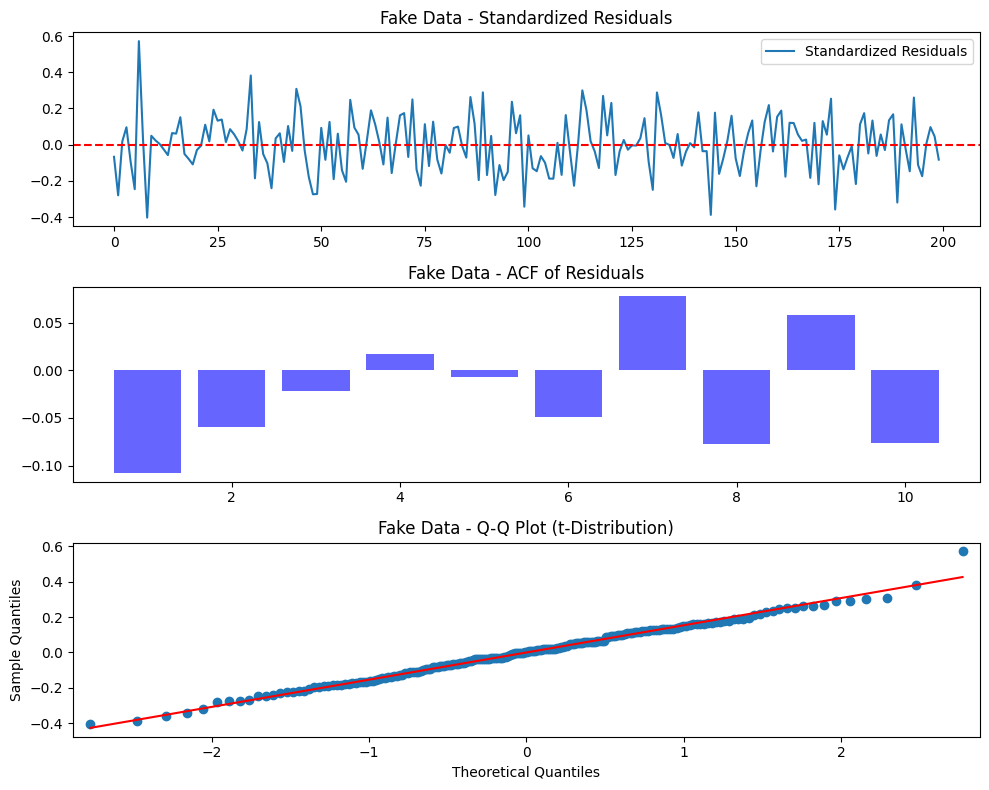

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import acf, q_stat
from scipy import stats  # t-분포 검정용 라이브러리
from scipy.stats import shapiro
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import gennorm
import seaborn as sns


# 데이터 로드 (200개 크기의 데이터)
real_returns = real_return_garch_df_5
fake_returns = fake_return_garch_df_5

# GARCH(1,1) 모델 적합 함수
def fit_garch_model(returns, name="Dataset"):
    # GARCH(1,1) 모델 적합
    model = arch_model(returns, vol='Garch', p=1, q=1, dist='t')  # 오차항을 t-분포로 설정
    result = model.fit(disp="off")  # 출력 숨김
    
    print(f"\n### {name} - GARCH(1,1) 결과 ###")
    print(result.summary())

    return result

# 모델 적합
real_garch_result = fit_garch_model(real_returns, name="Real Data")
fake_garch_result = fit_garch_model(fake_returns, name="Fake Data")

from scipy.stats import cramervonmises

def cramervonmises_t_test(data, df):
    result = cramervonmises(data, 't', args=(df,))
    print(f"Cramér–von Mises Test (t-분포 자유도={df}): stat={result.statistic:.4f}, p-value={result.pvalue:.4f}")

# 잔차 분석 함수 (t-분포 검정 추가)
def residual_analysis(garch_result, returns, name="Dataset"):
    residuals = garch_result.resid
    standardized_residuals = residuals / np.sqrt(garch_result.conditional_volatility)

    print(f"\n### {name} - 잔차 분석 (t-분포 검정) ###")

    # 1. t-분포 자유도 추정
    df_hat, loc, scale = stats.t.fit(standardized_residuals)  # t-분포 자유도 추정
    print(f"추정된 자유도 (df): {df_hat:.4f}")

    # 2. Anderson-Darling Test (K-S Test 대신 사용)
    cramervonmises_t_test(standardized_residuals, df_hat)
    
    # 2. Kolmogorov-Smirnov (K-S) 검정 (t-분포 적합성 검정)
    df_list = [3, 5, 10, 30]  # 여러 개의 자유도 테스트
    for df_test in df_list:
        ks_stat, ks_pval = stats.kstest(standardized_residuals, 't', args=(df_test,loc, scale))
        print(f"K-S Test (t-분포 자유도={df_test}): stat={ks_stat:.4f}, p-value={ks_pval:.4f}")

    ks_stat, ks_pval = stats.kstest(standardized_residuals, 't', args=(df_hat,loc, scale))
    print(f"K-S Test (t-분포 적합성 검정): stat={ks_stat:.4f}, p-value={ks_pval:.4f}")


    ks_stat_cauchy, ks_pval_cauchy = stats.kstest(standardized_residuals, 'cauchy')
    print(f"K-S Test (Cauchy 분포): stat={ks_stat_cauchy:.4f}, p-value={ks_pval_cauchy:.4f}")

    

    shape_hat, loc, scale = gennorm.fit(standardized_residuals)
    ks_stat_ged, ks_pval_ged = stats.kstest(standardized_residuals, 'gennorm', args=(shape_hat, loc, scale))

    print(f"K-S Test (GED 분포): stat={ks_stat_ged:.4f}, p-value={ks_pval_ged:.4f}")
    print(f"추정된 GED shape parameter: {shape_hat:.4f}")



    # 3. Ljung-Box Test (자기상관 검정)
    lags = 10
    acf_values = acf(standardized_residuals, fft=False, nlags=lags)
    q_stat_values, p_values = q_stat(acf_values[1:], len(returns))
    print(f"Ljung-Box Q-stat p-values (첫 {lags}개): {p_values[:lags]}")

    # 4. ARCH 효과 검정 (Engle’s ARCH Test)
    arch_test = het_arch(standardized_residuals)
    print(f"ARCH Test: stat={arch_test[0]:.4f}, p-value={arch_test[1]:.4f}")

    # 그래프 플로팅
    fig, ax = plt.subplots(3, 1, figsize=(10, 8))

    # (1) 잔차 시계열
    ax[0].plot(standardized_residuals, label="Standardized Residuals")
    ax[0].axhline(y=0, color='r', linestyle='--')
    ax[0].set_title(f"{name} - Standardized Residuals")
    ax[0].legend()

    # (2) ACF 플롯
    ax[1].bar(range(1, lags + 1), acf_values[1:], color='blue', alpha=0.6)
    ax[1].set_title(f"{name} - ACF of Residuals")

    # (3) Q-Q 플롯 (t-분포 기준)
    sm.qqplot(standardized_residuals, line='s', dist=stats.t, distargs=(df_hat,), ax=ax[2])
    ax[2].set_title(f"{name} - Q-Q Plot (t-Distribution)")

    

    shapiro_stat, shapiro_pval = shapiro(standardized_residuals)
    print(f"Shapiro-Wilk Test: stat={shapiro_stat:.4f}, p-value={shapiro_pval:.4f}")

    jb_stat, jb_pval, skew, kurtosis = jarque_bera(standardized_residuals)
    print(f"Jarque-Bera Test: stat={jb_stat:.4f}, p-value={jb_pval:.4f}")
    print(f"Skewness: {skew:.4f}, Kurtosis: {kurtosis:.4f}")

    plt.tight_layout()
    plt.show()
    




# 🔹 실행 (REAL과 FAKE 개별 분석)
residual_analysis(real_garch_result, real_returns, name="Real Data")
residual_analysis(fake_garch_result, fake_returns, name="Fake Data")


In [86]:
def fit_garch_model(returns, name="Dataset"):
    # GARCH(1,1) 모델 적합
    model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')  # 오차항을 t-분포로 설정
    result = model.fit(disp="off")  # 출력 숨김
    
    print(f"\n### {name} - GARCH(1,1) 결과 ###")
    print(result.summary())

    return result

fit_garch_model(fake_returns, name="Fake Data")


### Fake Data - GARCH(1,1) 결과 ###
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                467.471
Distribution:                  Normal   AIC:                          -926.943
Method:            Maximum Likelihood   BIC:                          -913.750
                                        No. Observations:                  200
Date:                Mon, Feb 24 2025   Df Residuals:                      199
Time:                        14:15:26   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.7384e-0

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                467.471
Distribution:                  Normal   AIC:                          -926.943
Method:            Maximum Likelihood   BIC:                          -913.750
                                        No. Observations:                  200
Date:                Mon, Feb 24 2025   Df Residuals:                      199
Time:                        14:15:26   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.7384e-04  1.941e-03      0.502      0.616 

In [79]:
# 모델을 학습하고 결과 저장하는 함수
def fit_garch_model(returns, p=1, q=1, model_type="GARCH", name="Dataset"):
    if model_type == "GARCH":
        model = arch_model(returns, vol='Garch', p=p, q=q, dist='t')
    elif model_type == "ARCH":
        model = arch_model(returns, vol='Garch', p=0, q=q, dist='t')
    elif model_type == "EGARCH":
        model = arch_model(returns, vol='EGarch', p=p, q=q, dist='t')
    elif model_type == "GJR-GARCH":
        model = arch_model(returns, vol='Garch', p=p, q=q, o=1, dist='t')  # GJR-GARCH는 'o' 옵션 추가
    else:
        raise ValueError("지원하지 않는 모델입니다.")
    
    result = model.fit(disp="off")  # 출력 숨김
    print(f"\n### {name} - {model_type}({p},{q}) 결과 ###")
    print(result.summary())
    
    return result

# 다양한 모델 적합
models = [ "GARCH", "GARCH", "GARCH", "EGARCH", "GJR-GARCH"]
params = [ (1, 1), (1, 2), (2, 1), (1, 1), (1, 1)]  # (p, q) 설정

real_results = {}
fake_results = {}

for model, (p, q) in zip(models, params):
    real_results[f"{model}({p},{q})"] = fit_garch_model(real_returns, p, q, model, name="Real Data")
    fake_results[f"{model}({p},{q})"] = fit_garch_model(fake_returns, p, q, model, name="Fake Data")

# 모델 성능 비교
def compare_models(results_dict, name="Dataset"):
    print(f"\n### {name} - 모델 성능 비교 ###")
    for model_name, result in results_dict.items():
        print(f"{model_name}: Log-Likelihood={result.loglikelihood:.4f}, AIC={result.aic:.4f}, BIC={result.bic:.4f}")

# 성능 비교 실행
compare_models(real_results, name="Real Data")
compare_models(fake_results, name="Fake Data")


c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\


### Real Data - GARCH(1,1) 결과 ###
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                617.733
Distribution:      Standardized Student's t   AIC:                          -1225.47
Method:                  Maximum Likelihood   BIC:                          -1208.98
                                              No. Observations:                  200
Date:                      Mon, Feb 24 2025   Df Residuals:                      199
Time:                              14:00:28   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [75]:
import numpy as np
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import acf, q_stat

# 🔹 잔차 제곱 분석 함수 (Ljung-Box Test & ARCH Test)
def squared_residual_analysis(garch_result, returns, name="Dataset"):
    residuals = garch_result.resid
    squared_residuals = residuals**2  # 잔차 제곱

    print(f"\n### {name} - 잔차 제곱 분석 ###")

    # ✅ 1. Ljung-Box Test (잔차 제곱의 자기상관 검정)
    lags = 10
    lb_values, lb_pvalues = q_stat(acf(squared_residuals, nlags=lags, fft=False)[1:], len(squared_residuals))
    print(f"Ljung-Box Q-stat p-values (잔차 제곱, 첫 {lags}개): {lb_pvalues[:lags]}")

    # ✅ 2. ARCH Test (이분산성 검정)
    arch_stat, arch_pval, _, _ = het_arch(squared_residuals)
    print(f"ARCH Test: stat={arch_stat:.4f}, p-value={arch_pval:.4f}")

# 🔹 GARCH(1,1) 모델 적합 함수
def fit_garch_model(returns, name="Dataset"):
    model = arch_model(returns, vol='Garch', p=1, q=1, dist='t')  # T-분포 가정
    result = model.fit(disp="off")  # 출력 숨김
    print(f"\n### {name} - GARCH(1,1) 결과 ###")
    print(result.summary())
    return result

# 🔹 GARCH 모델 적합
real_garch_result = fit_garch_model(real_return_garch_df_5, name="Real Data")
fake_garch_result = fit_garch_model(fake_return_garch_df_5, name="Fake Data")

# 🔹 잔차 제곱 분석 실행
squared_residual_analysis(real_garch_result, real_return_garch_df_5, name="Real Data")
squared_residual_analysis(fake_garch_result, fake_return_garch_df_5, name="Fake Data")



### Real Data - GARCH(1,1) 결과 ###
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                469.343
Distribution:      Standardized Student's t   AIC:                          -928.686
Method:                  Maximum Likelihood   BIC:                          -912.195
                                              No. Observations:                  200
Date:                      Mon, Feb 24 2025   Df Residuals:                      199
Time:                              13:42:38   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
--------------------------------------------

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0005778. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000554. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [108]:
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch



portfolio_index_garch_10_real = 489
portfolio_index_garch_10_fake = 442
index_AR_N=4


# 데이터 준비
real_return_garch_df_10 = real[portfolio_index_garch_10_real, index_AR_N, :]
real_return_garch_df_10= real_return_garch_df_10.cpu().numpy()
fake_return_garch_df_10 = fake[portfolio_index_garch_10_fake, index_AR_N, :]

In [109]:
def remove_outliers(data):
    Q1 = np.percentile(data, 25)  # 1사분위
    Q3 = np.percentile(data, 75)  # 3사분위
    IQR = Q3 - Q1                 # IQR 계산

    # 이상치 기준
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치를 벗어난 데이터 필터링
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
    print(f"Outliers Removed: {len(data) - len(filtered_data)}")
    return filtered_data

# Fake Data에서 이상치 제거
filtered_fake_returns = remove_outliers(fake_return_garch_df_10)


Outliers Removed: 1


c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(



### Real Data - GARCH(1,1) 결과 ###
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                617.733
Distribution:      Standardized Student's t   AIC:                          -1225.47
Method:                  Maximum Likelihood   BIC:                          -1208.98
                                              No. Observations:                  200
Date:                      Mon, Feb 24 2025   Df Residuals:                      199
Time:                              15:50:12   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------

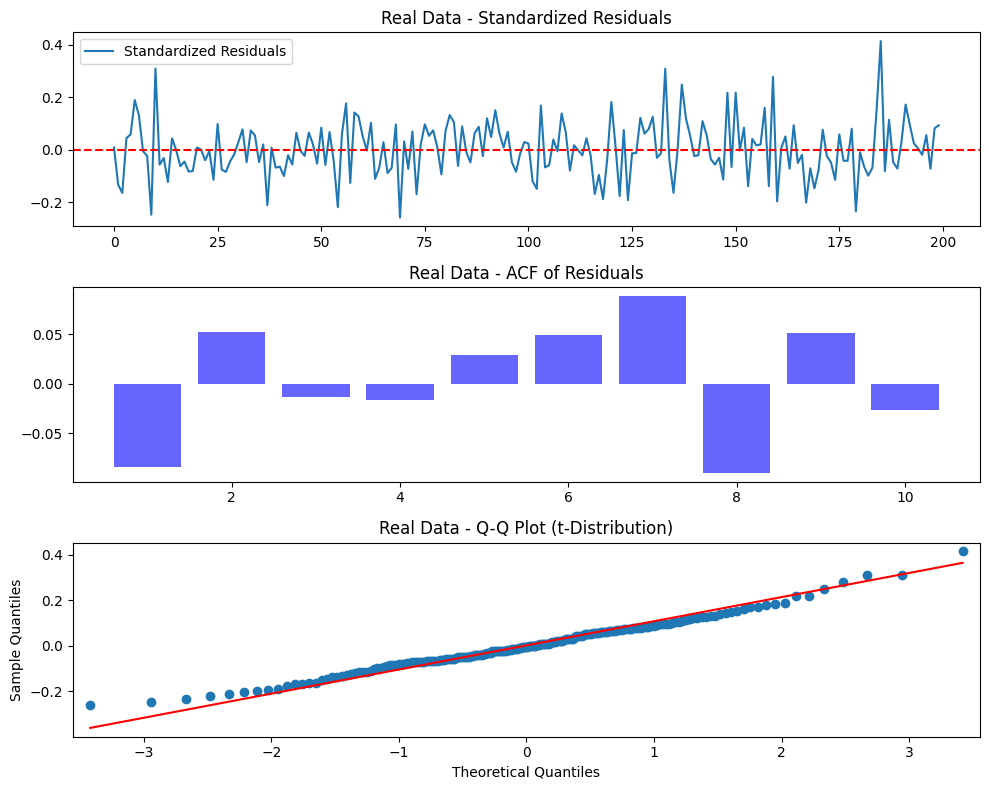


### Fake Data - 잔차 분석 (t-분포 검정) ###
추정된 자유도 (df): 19122325373.9211
Cramér–von Mises Test (t-분포 자유도=19122325373.92106): stat=10.7517, p-value=0.0000
K-S Test (t-분포 자유도=3): stat=0.0724, p-value=0.2355
K-S Test (t-분포 자유도=5): stat=0.0585, p-value=0.4857
K-S Test (t-분포 자유도=10): stat=0.0624, p-value=0.4048
K-S Test (t-분포 자유도=30): stat=0.0650, p-value=0.3541
K-S Test (t-분포 적합성 검정): stat=0.0664, p-value=0.3299
K-S Test (Cauchy 분포): stat=0.4089, p-value=0.0000
K-S Test (GED 분포): stat=0.0560, p-value=0.5429
추정된 GED shape parameter: 4.2885
Ljung-Box Q-stat p-values (첫 10개): [0.03730335 0.07134433 0.02513721 0.04754583 0.0119357  0.01548434
 0.02784809 0.02781995 0.04409756 0.06765746]
ARCH Test: stat=4.6519, p-value=0.9132
Shapiro-Wilk Test: stat=0.9821, p-value=0.0121
Jarque-Bera Test: stat=5.8521, p-value=0.0536
Skewness: 0.1632, Kurtosis: 2.2259


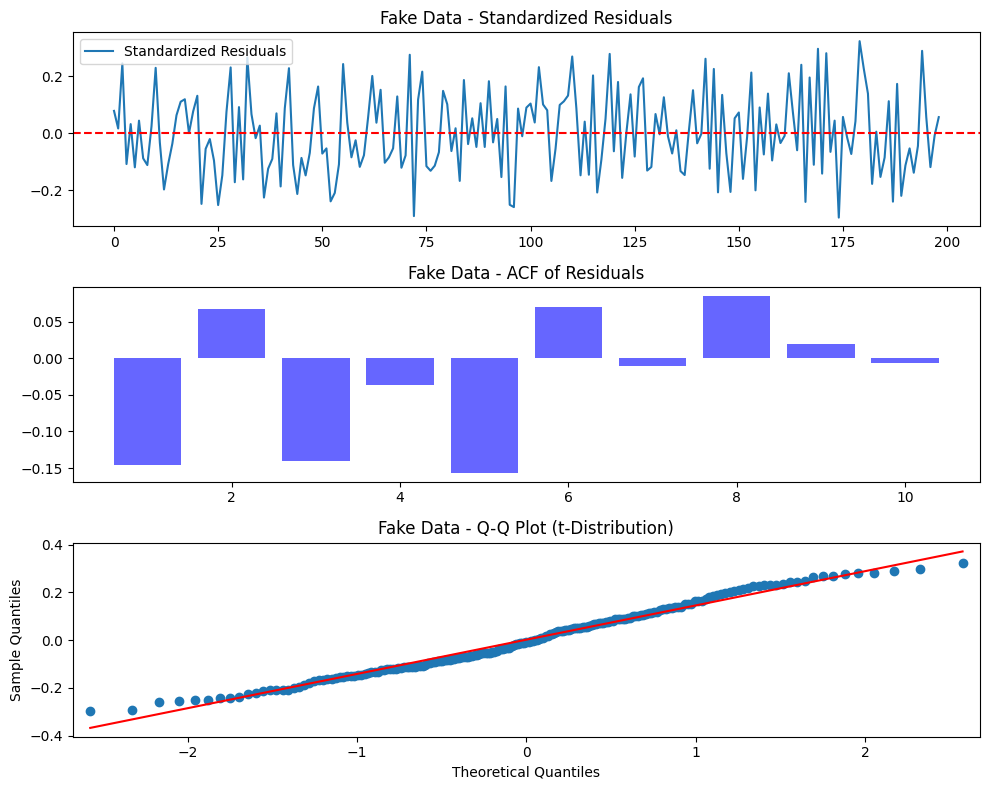

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import acf, q_stat
from scipy import stats  # t-분포 검정용 라이브러리
from scipy.stats import shapiro
from statsmodels.stats.stattools import jarque_bera
from scipy.stats import gennorm
import seaborn as sns


# 데이터 로드 (200개 크기의 데이터)
real_returns_10 = real_return_garch_df_10
fake_returns_10 = filtered_fake_returns

# GARCH(1,1) 모델 적합 함수
def fit_garch_model(returns, name="Dataset"):
    # GARCH(1,1) 모델 적합
    model = arch_model(returns, vol='Garch', p=1, q=1, dist='t')  # 오차항을 t-분포로 설정
    result = model.fit(disp="off")  # 출력 숨김
    
    print(f"\n### {name} - GARCH(1,1) 결과 ###")
    print(result.summary())

    return result

# 모델 적합
real_garch_result_10 = fit_garch_model(real_returns_10, name="Real Data")
fake_garch_result_10 = fit_garch_model(fake_returns_10, name="Fake Data")

from scipy.stats import cramervonmises

def cramervonmises_t_test(data, df):
    result = cramervonmises(data, 't', args=(df,))
    print(f"Cramér–von Mises Test (t-분포 자유도={df}): stat={result.statistic:.4f}, p-value={result.pvalue:.4f}")

# 잔차 분석 함수 (t-분포 검정 추가)
def residual_analysis(garch_result, returns, name="Dataset"):
    residuals = garch_result.resid
    standardized_residuals = residuals / np.sqrt(garch_result.conditional_volatility)

    print(f"\n### {name} - 잔차 분석 (t-분포 검정) ###")

    # 1. t-분포 자유도 추정
    df_hat, loc, scale = stats.t.fit(standardized_residuals)  # t-분포 자유도 추정
    print(f"추정된 자유도 (df): {df_hat:.4f}")

    # 2. Anderson-Darling Test (K-S Test 대신 사용)
    cramervonmises_t_test(standardized_residuals, df_hat)
    
    # 2. Kolmogorov-Smirnov (K-S) 검정 (t-분포 적합성 검정)
    df_list = [3, 5, 10, 30]  # 여러 개의 자유도 테스트
    for df_test in df_list:
        ks_stat, ks_pval = stats.kstest(standardized_residuals, 't', args=(df_test,loc, scale))
        print(f"K-S Test (t-분포 자유도={df_test}): stat={ks_stat:.4f}, p-value={ks_pval:.4f}")

    ks_stat, ks_pval = stats.kstest(standardized_residuals, 't', args=(df_hat,loc, scale))
    print(f"K-S Test (t-분포 적합성 검정): stat={ks_stat:.4f}, p-value={ks_pval:.4f}")


    ks_stat_cauchy, ks_pval_cauchy = stats.kstest(standardized_residuals, 'cauchy')
    print(f"K-S Test (Cauchy 분포): stat={ks_stat_cauchy:.4f}, p-value={ks_pval_cauchy:.4f}")

    

    shape_hat, loc, scale = gennorm.fit(standardized_residuals)
    ks_stat_ged, ks_pval_ged = stats.kstest(standardized_residuals, 'gennorm', args=(shape_hat, loc, scale))

    print(f"K-S Test (GED 분포): stat={ks_stat_ged:.4f}, p-value={ks_pval_ged:.4f}")
    print(f"추정된 GED shape parameter: {shape_hat:.4f}")



    # 3. Ljung-Box Test (자기상관 검정)
    lags = 10
    acf_values = acf(standardized_residuals, fft=False, nlags=lags)
    q_stat_values, p_values = q_stat(acf_values[1:], len(returns))
    print(f"Ljung-Box Q-stat p-values (첫 {lags}개): {p_values[:lags]}")

    # 4. ARCH 효과 검정 (Engle’s ARCH Test)
    arch_test = het_arch(standardized_residuals)
    print(f"ARCH Test: stat={arch_test[0]:.4f}, p-value={arch_test[1]:.4f}")

    # 그래프 플로팅
    fig, ax = plt.subplots(3, 1, figsize=(10, 8))

    # (1) 잔차 시계열
    ax[0].plot(standardized_residuals, label="Standardized Residuals")
    ax[0].axhline(y=0, color='r', linestyle='--')
    ax[0].set_title(f"{name} - Standardized Residuals")
    ax[0].legend()

    # (2) ACF 플롯
    ax[1].bar(range(1, lags + 1), acf_values[1:], color='blue', alpha=0.6)
    ax[1].set_title(f"{name} - ACF of Residuals")

    # (3) Q-Q 플롯 (t-분포 기준)
    sm.qqplot(standardized_residuals, line='s', dist=stats.t, distargs=(df_hat,), ax=ax[2])
    ax[2].set_title(f"{name} - Q-Q Plot (t-Distribution)")

    

    shapiro_stat, shapiro_pval = shapiro(standardized_residuals)
    print(f"Shapiro-Wilk Test: stat={shapiro_stat:.4f}, p-value={shapiro_pval:.4f}")

    jb_stat, jb_pval, skew, kurtosis = jarque_bera(standardized_residuals)
    print(f"Jarque-Bera Test: stat={jb_stat:.4f}, p-value={jb_pval:.4f}")
    print(f"Skewness: {skew:.4f}, Kurtosis: {kurtosis:.4f}")

    plt.tight_layout()
    plt.show()
    




# 🔹 실행 (REAL과 FAKE 개별 분석)
residual_analysis(real_garch_result_10, real_returns_10, name="Real Data")
residual_analysis(fake_garch_result_10, fake_returns_10, name="Fake Data")


In [102]:
def fit_garch_model(returns, name="Dataset"):
    # GARCH(1,1) 모델 적합
    model = arch_model(returns, vol='Garch', p=1, q=1, dist='normal')  # 오차항을 t-분포로 설정
    result = model.fit(disp="off")  # 출력 숨김
    
    print(f"\n### {name} - GARCH(1,1) 결과 ###")
    print(result.summary())

    return result

fit_garch_model(fake_returns_10, name="Fake Data")


### Fake Data - GARCH(1,1) 결과 ###
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                492.120
Distribution:                  Normal   AIC:                          -976.240
Method:            Maximum Likelihood   BIC:                          -963.067
                                        No. Observations:                  199
Date:                Mon, Feb 24 2025   Df Residuals:                      198
Time:                        15:50:29   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -7.

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                492.120
Distribution:                  Normal   AIC:                          -976.240
Method:            Maximum Likelihood   BIC:                          -963.067
                                        No. Observations:                  199
Date:                Mon, Feb 24 2025   Df Residuals:                      198
Time:                        15:50:29   Df Model:                            1
                                   Mean Model                                  
                  coef    std err          t      P>|t|        95.0% Conf. Int.
-------------------------------------------------------------------------------
mu         -7.8400e-04  5.590e-07  -1402.563     

In [103]:
import numpy as np
import statsmodels.api as sm
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch
from statsmodels.tsa.stattools import acf, q_stat

# 🔹 잔차 제곱 분석 함수 (Ljung-Box Test & ARCH Test)
def squared_residual_analysis(garch_result, returns, name="Dataset"):
    residuals = garch_result.resid
    squared_residuals = residuals**2  # 잔차 제곱

    print(f"\n### {name} - 잔차 제곱 분석 ###")

    # ✅ 1. Ljung-Box Test (잔차 제곱의 자기상관 검정)
    lags = 10
    lb_values, lb_pvalues = q_stat(acf(squared_residuals, nlags=lags, fft=False)[1:], len(squared_residuals))
    print(f"Ljung-Box Q-stat p-values (잔차 제곱, 첫 {lags}개): {lb_pvalues[:lags]}")

    # ✅ 2. ARCH Test (이분산성 검정)
    arch_stat, arch_pval, _, _ = het_arch(squared_residuals)
    print(f"ARCH Test: stat={arch_stat:.4f}, p-value={arch_pval:.4f}")

# 🔹 GARCH(1,1) 모델 적합 함수
def fit_garch_model(returns, name="Dataset"):
    model = arch_model(returns, vol='Garch', p=1, q=1, dist='t')  # T-분포 가정
    result = model.fit(disp="off")  # 출력 숨김
    print(f"\n### {name} - GARCH(1,1) 결과 ###")
    print(result.summary())
    return result

# 🔹 GARCH 모델 적합
real_garch_result = fit_garch_model(real_return_garch_df_10, name="Real Data")
fake_garch_result = fit_garch_model(filtered_fake_returns, name="Fake Data")

# 🔹 잔차 제곱 분석 실행
squared_residual_analysis(real_garch_result, real_return_garch_df_10, name="Real Data")
squared_residual_analysis(fake_garch_result, filtered_fake_returns, name="Fake Data")



### Real Data - GARCH(1,1) 결과 ###
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                617.733
Distribution:      Standardized Student's t   AIC:                          -1225.47
Method:                  Maximum Likelihood   BIC:                          -1208.98
                                              No. Observations:                  200
Date:                      Mon, Feb 24 2025   Df Residuals:                      199
Time:                              15:50:42   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [105]:
# 모델을 학습하고 결과 저장하는 함수
def fit_garch_model(returns, p=1, q=1, model_type="GARCH", name="Dataset"):
    if model_type == "GARCH":
        model = arch_model(returns, vol='Garch', p=p, q=q, dist='t')
    elif model_type == "ARCH":
        model = arch_model(returns, vol='Garch', p=0, q=q, dist='t')
    elif model_type == "EGARCH":
        model = arch_model(returns, vol='EGarch', p=p, q=q, dist='t')
    elif model_type == "GJR-GARCH":
        model = arch_model(returns, vol='Garch', p=p, q=q, o=1, dist='t')  # GJR-GARCH는 'o' 옵션 추가
    else:
        raise ValueError("지원하지 않는 모델입니다.")
    
    result = model.fit(disp="off")  # 출력 숨김
    print(f"\n### {name} - {model_type}({p},{q}) 결과 ###")
    print(result.summary())
    
    return result

# 다양한 모델 적합
models = [ "GARCH", "GARCH", "GARCH", "EGARCH", "GJR-GARCH"]
params = [ (1, 1), (1, 2), (2, 1), (1, 1), (1, 1)]  # (p, q) 설정

real_results_10 = {}
fake_results_10 = {}

for model, (p, q) in zip(models, params):
    real_results_10[f"{model}({p},{q})"] = fit_garch_model(real_return_garch_df_10, p, q, model, name="Real Data")
    fake_results_10[f"{model}({p},{q})"] = fit_garch_model(filtered_fake_returns, p, q, model, name="Fake Data")

# 모델 성능 비교
def compare_models(results_dict, name="Dataset"):
    print(f"\n### {name} - 모델 성능 비교 ###")
    for model_name, result in results_dict.items():
        print(f"{model_name}: Log-Likelihood={result.loglikelihood:.4f}, AIC={result.aic:.4f}, BIC={result.bic:.4f}")

# 성능 비교 실행
compare_models(real_results_10, name="Real Data")
compare_models(fake_results_10, name="Fake Data")


c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\


### Real Data - GARCH(1,1) 결과 ###
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                            y   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                617.733
Distribution:      Standardized Student's t   AIC:                          -1225.47
Method:                  Maximum Likelihood   BIC:                          -1208.98
                                              No. Observations:                  200
Date:                      Mon, Feb 24 2025   Df Residuals:                      199
Time:                              15:52:49   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------

c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000126. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
c:\Users\A\AppData\Local\Programs\Python\Python311\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0004188. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


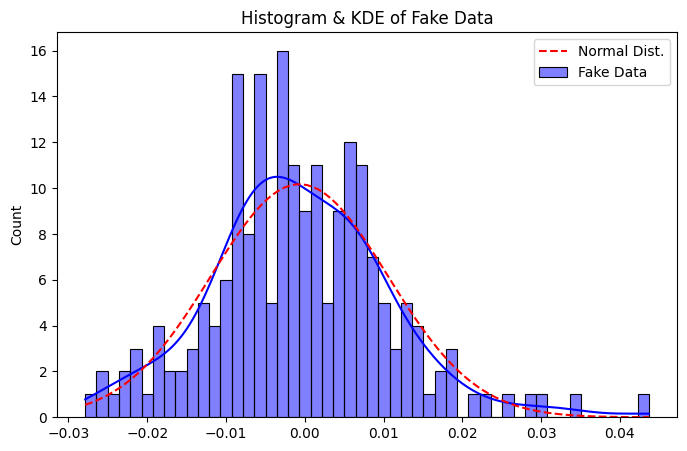

Jarque-Bera Test: stat=18.4717, p-value=0.0001
Shapiro-Wilk Test: stat=0.9810, p-value=0.0083
Kurtosis: 1.1927 (정규분포는 3)
Skewness: 0.4456 (정규분포는 0)
norm: KS p-value = 0.6353
t: KS p-value = 0.8349
gamma: KS p-value = 0.5378
expon: KS p-value = 0.0000
chi2: KS p-value = 0.0000
laplace: KS p-value = 0.1388

가장 적합한 분포: t, KS p-value = 0.8349


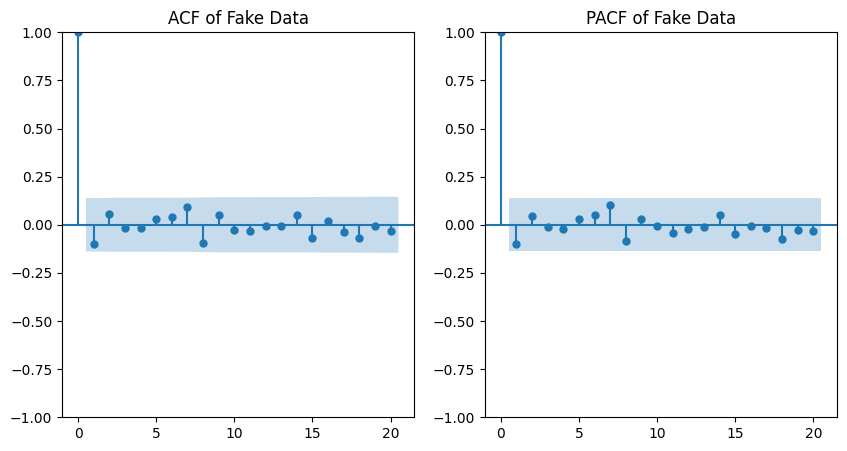

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Fake Data
fake_data = real_return_garch_df_10  # 데이터 가져오기

# 히스토그램 & KDE 플롯
plt.figure(figsize=(8,5))
sns.histplot(fake_data, kde=True, bins=50, color="blue", label="Fake Data")

# 정규분포 비교
mu, sigma = np.mean(fake_data), np.std(fake_data)
x = np.linspace(min(fake_data), max(fake_data), 100)
plt.plot(x, norm.pdf(x, mu, sigma) * len(fake_data) * (max(fake_data) - min(fake_data)) / 50, 
         label="Normal Dist.", linestyle="dashed", color="red")

plt.title("Histogram & KDE of Fake Data")
plt.legend()
plt.show()

from scipy.stats import jarque_bera, shapiro

# Jarque-Bera Test
jb_stat, jb_p = jarque_bera(fake_data)
print(f"Jarque-Bera Test: stat={jb_stat:.4f}, p-value={jb_p:.4f}")

# Shapiro-Wilk Test
sw_stat, sw_p = shapiro(fake_data)
print(f"Shapiro-Wilk Test: stat={sw_stat:.4f}, p-value={sw_p:.4f}")

from scipy.stats import kurtosis, skew

kurt = kurtosis(fake_data)
skw = skew(fake_data)

print(f"Kurtosis: {kurt:.4f} (정규분포는 3)")
print(f"Skewness: {skw:.4f} (정규분포는 0)")

import scipy.stats as stats

# 테스트할 분포 리스트
distributions = [stats.norm, stats.t, stats.gamma, stats.expon, stats.chi2, stats.laplace]

best_dist = None
best_pval = 0

for dist in distributions:
    params = dist.fit(fake_data)  # 분포 적합
    ks_stat, p_val = stats.kstest(fake_data, dist.name, args=params)  # KS Test

    print(f"{dist.name}: KS p-value = {p_val:.4f}")

    # 가장 좋은 적합도 찾기 (p-value가 클수록 데이터와 잘 맞음)
    if p_val > best_pval:
        best_pval = p_val
        best_dist = dist

print(f"\n가장 적합한 분포: {best_dist.name}, KS p-value = {best_pval:.4f}")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_acf(fake_data, lags=20, ax=plt.gca())
plt.title("ACF of Fake Data")

plt.subplot(1,2,2)
plot_pacf(fake_data, lags=20, ax=plt.gca())
plt.title("PACF of Fake Data")

plt.show()



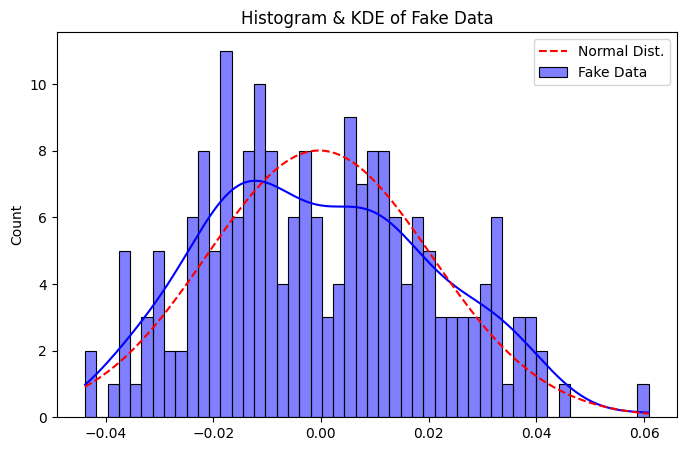

Jarque-Bera Test: stat=4.7160, p-value=0.0946
Shapiro-Wilk Test: stat=0.9854, p-value=0.0370
Kurtosis: -0.5863 (정규분포는 3)
Skewness: 0.2357 (정규분포는 0)
norm: KS p-value = 0.3284
t: KS p-value = 0.3285
gamma: KS p-value = 0.7527
expon: KS p-value = 0.0000
chi2: KS p-value = 0.0000
laplace: KS p-value = 0.0925

가장 적합한 분포: gamma, KS p-value = 0.7527


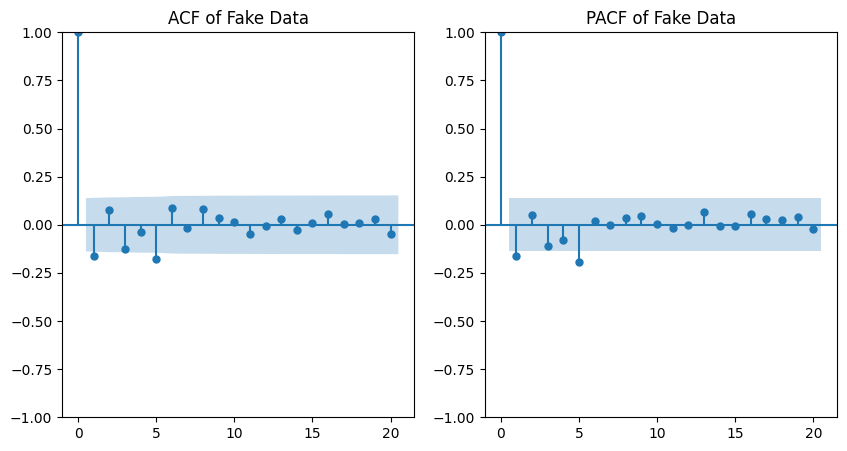

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Fake Data
fake_data = fake_return_garch_df_10  # 데이터 가져오기

# 히스토그램 & KDE 플롯
plt.figure(figsize=(8,5))
sns.histplot(fake_data, kde=True, bins=50, color="blue", label="Fake Data")

# 정규분포 비교
mu, sigma = np.mean(fake_data), np.std(fake_data)
x = np.linspace(min(fake_data), max(fake_data), 100)
plt.plot(x, norm.pdf(x, mu, sigma) * len(fake_data) * (max(fake_data) - min(fake_data)) / 50, 
         label="Normal Dist.", linestyle="dashed", color="red")

plt.title("Histogram & KDE of Fake Data")
plt.legend()
plt.show()

from scipy.stats import jarque_bera, shapiro

# Jarque-Bera Test
jb_stat, jb_p = jarque_bera(fake_data)
print(f"Jarque-Bera Test: stat={jb_stat:.4f}, p-value={jb_p:.4f}")

# Shapiro-Wilk Test
sw_stat, sw_p = shapiro(fake_data)
print(f"Shapiro-Wilk Test: stat={sw_stat:.4f}, p-value={sw_p:.4f}")

from scipy.stats import kurtosis, skew

kurt = kurtosis(fake_data)
skw = skew(fake_data)

print(f"Kurtosis: {kurt:.4f} (정규분포는 3)")
print(f"Skewness: {skw:.4f} (정규분포는 0)")

import scipy.stats as stats

# 테스트할 분포 리스트
distributions = [stats.norm, stats.t, stats.gamma, stats.expon, stats.chi2, stats.laplace]

best_dist = None
best_pval = 0

for dist in distributions:
    params = dist.fit(fake_data)  # 분포 적합
    ks_stat, p_val = stats.kstest(fake_data, dist.name, args=params)  # KS Test

    print(f"{dist.name}: KS p-value = {p_val:.4f}")

    # 가장 좋은 적합도 찾기 (p-value가 클수록 데이터와 잘 맞음)
    if p_val > best_pval:
        best_pval = p_val
        best_dist = dist

print(f"\n가장 적합한 분포: {best_dist.name}, KS p-value = {best_pval:.4f}")

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_acf(fake_data, lags=20, ax=plt.gca())
plt.title("ACF of Fake Data")

plt.subplot(1,2,2)
plot_pacf(fake_data, lags=20, ax=plt.gca())
plt.title("PACF of Fake Data")

plt.show()



In [152]:
import numpy as np

# ✅ 저장된 loss 데이터 불러오기
loss_dge = np.load("loss_dge_0215.npy")

# ✅ 로드된 데이터 확인
print("✅ Loss Data Loaded Successfully!")
print("Loss DGE Shape:", loss_dge.shape)  # 배열의 크기 출력
print("First 5 Values:\n", loss_dge[:, :5])  # 앞의 일부 값만 출력


✅ Loss Data Loaded Successfully!
Loss DGE Shape: (2, 13500)
First 5 Values:
 [[-0.00763803 -0.00755773 -0.00811577 -0.00779576 -0.00724483]
 [ 5.90495872  5.90467024  5.90503349  5.90458345  5.90390878]]


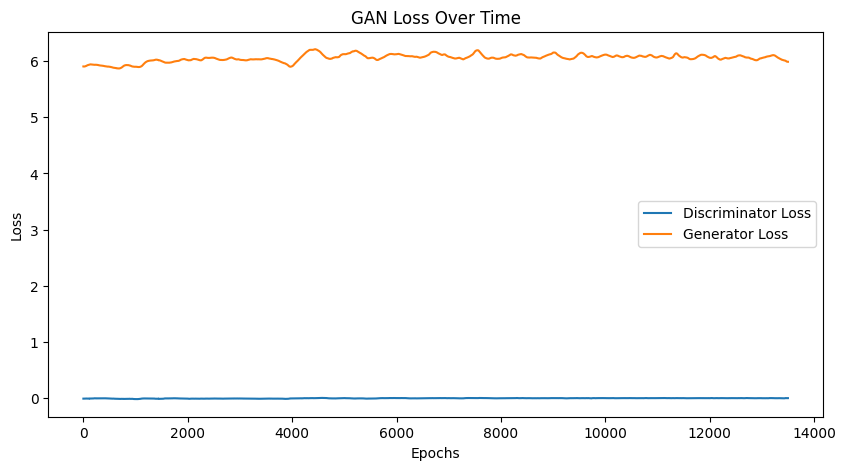

In [153]:
import matplotlib.pyplot as plt

# ✅ Discriminator Loss와 Generator Loss 그래프 그리기
plt.figure(figsize=(10, 5))
plt.plot(loss_dge[0], label="Discriminator Loss")
plt.plot(loss_dge[1], label="Generator Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("GAN Loss Over Time")
plt.legend()
plt.show()


In [202]:
def Inc2Price(data):
    # ✅ GPU에서 실행되도록 `device` 설정
    device = data.device  # data_tensor가 있는 장치 (CPU 또는 GPU)

    # ✅ GPU에서 실행되도록 `torch.Tensor(...)` 수정
    price0 = torch.zeros(data.shape[0], data.shape[1], 1, device=device) + 1  # fill_(1) 대신 +1 사용
    prices_l = torch.cat((price0, data), dim=2)  # GPU에서 실행
    prices_l = torch.cumsum(prices_l, dim=2)  # 누적 합 계산 (GPU에서 실행됨)

    return prices_l

# ✅ GPU에서 실행되도록 보장
def StaticPort(prices_l, n_trans=50):
    device = prices_l.device  # ✅ 입력 텐서(prices_l)의 장치를 자동 감지 (CPU 또는 GPU)

    
    num_assets = prices_l.shape[1]  # 5개의 개별 자산

    # ✅ 랜덤 변환 행렬(Transition Matrix) 생성 (GPU에서 실행되도록 수정)
    torch.manual_seed(42)  # 재현 가능성을 위해 시드 설정
    trans_mat = torch.rand(num_assets, n_trans, device=device)  # ✅ GPU에서 생성

    # ✅ 변환 행렬을 배치 크기만큼 확장 (GPU에서 실행)
    broad_trans_mat = trans_mat.unsqueeze(0).repeat(prices_l.size(0), 1, 1)  # (1000, 5, 50)

    # 데이터 차원 변환 (배치, 자산, 시점 순으로 배치)
    swap_prices = prices_l.permute(0, 2, 1)  # (1000, 100, 5)

    # ✅ 모든 데이터 타입을 Float으로 변환 (GPU에서 실행)
    swap_prices = swap_prices.float().to(device)
    broad_trans_mat = broad_trans_mat.float().to(device)

    # ✅ 포트폴리오 변환 (GPU에서 실행)
    swap_trans_prices = torch.bmm(swap_prices, broad_trans_mat)  # (1000, 100, 50)
    port_prices_l = swap_trans_prices.permute(0, 2, 1)  # (1000, 50, 100)

    return port_prices_l

def BuyHold(port_prices_l, Cap):
    device = port_prices_l.device  # ✅ port_prices_l가 있는 장치 확인

    # ✅ Cap을 GPU에서 사용할 수 있도록 변환
    Cap = torch.tensor(Cap, dtype=torch.float32, device=device)  

    # ✅ GPU에서 연산 수행
    BH_money_l = port_prices_l * Cap  # ✅ 포트폴리오 가치 계산 (GPU에서 실행)
    sum_PNL_PORT_BH = BH_money_l[:, :, -1] - BH_money_l[:, :, 0]  # ✅ PNL 계산
    


    return sum_PNL_PORT_BH
    
def BuyHold(prices_l, Cap):
    device = prices_l.device  # ✅ prices_l가 위치한 장치를 자동 감지 (CPU 또는 GPU)

    # ✅ Cap을 GPU에서 사용할 수 있도록 변환
    Cap = torch.tensor(Cap, dtype=torch.float32, device=device)  

    # ✅ GPU에서 연산 수행
    BH_money_l = prices_l * Cap  # ✅ 포트폴리오 가치 계산 (GPU에서 실행)
    sum_PNL_BH = BH_money_l[:, :, -1] - BH_money_l[:, :, 0]  # ✅ PNL 계산



    return sum_PNL_BH  # ✅ 정규화된 PNL 반환 (GPU에서 실행됨)

import torch

def rolling_mean(prices, window):
    """
    롤링 윈도우 이동 평균을 계산하는 함수
    - prices: 가격 데이터 (batch, assets, time)
    - window: 이동 평균 윈도우 크기
    """
    unfolded = prices.unfold(dimension=2, size=window, step=1)  # (배치, 자산, 시간, 윈도우)
    return unfolded.mean(dim=-1)  # 마지막 차원(윈도우)의 평균 계산

def MeanRev(prices, capital, WH, LR=0.05, SR=0.05):
    """
    Mean Reversion 전략을 수행하여 PNL(수익률) 계산 (롤링 윈도우 적용)
    - prices: 자산 가격 데이터 [배치 크기, 자산 개수, 시간 단계]
    - capital: 초기 투자 금액
    - WH: 이동 평균 윈도우 크기
    - LR: 롱(매수) 비율
    - SR: 숏(매도) 비율
    """

    # ✅ GPU에서 실행되도록 장치 설정
    device = prices.device  # ✅ prices가 위치한 장치를 자동 감지 (CPU 또는 GPU)
    capital = torch.tensor(capital, dtype=torch.float32, device=device)  # 초기 투자금 GPU로 변환

    # ✅ 올바른 이동평균 계산 (롤링 윈도우 방식 적용)
    rolling_mean_values = rolling_mean(prices, WH)

    # ✅ 초반 데이터 부족 구간을 NaN으로 채우기 (이동평균을 계산할 수 없는 부분)
    rolling_mean_values = torch.cat(
        [torch.full((prices.shape[0], prices.shape[1], WH-1), torch.nan, device=device), rolling_mean_values],
        dim=2
    )

    # ✅ 매매 신호 생성 (GPU에서 실행)
    buy_signal = (prices < rolling_mean_values * (1 - LR)).float()  # 가격이 평균보다 낮으면 매수
    sell_signal = (prices > rolling_mean_values * (1 + SR)).float()  # 가격이 평균보다 높으면 매도

    # ✅ 매매 후 수익률 계산 (PNL, GPU에서 실행)
    positions = buy_signal - sell_signal  # 매수(+1), 매도(-1), 유지(0)
    returns = torch.cat((torch.zeros_like(prices[:, :, :1], device=device), 
                         prices[:, :, 1:] - prices[:, :, :-1]), dim=2)

    # ✅ 누적 PNL 계산 (GPU에서 실행)
    pnl = capital * (positions * returns).cumsum(dim=2)



    return pnl[:,:,-1]  # ✅ 정규화된 PNL 반환 (GPU에서 실행됨)


def TrendFollowing(prices, capital, short_window, long_window, LR=0.05, SR=0.05):
    """
    Trend Following 전략을 수행하여 PNL(수익률) 계산 (롤링 윈도우 적용)
    - prices: 자산 가격 데이터 [배치 크기, 자산 개수, 시간 단계]
    - capital: 초기 투자 금액
    - short_window: 단기 이동 평균 윈도우 크기
    - long_window: 장기 이동 평균 윈도우 크기
    - LR: 롱(매수) 비율
    - SR: 숏(매도) 비율
    """

    # ✅ GPU에서 실행되도록 장치 설정
    device = prices.device
    capital = torch.tensor(capital, dtype=torch.float32, device=device)

    # ✅ 올바른 이동평균 계산 (롤링 윈도우 방식 적용)
    short_ma = rolling_mean(prices, short_window)
    long_ma = rolling_mean(prices, long_window)

    # ✅ 초반 데이터 부족 구간을 NaN으로 채우기 (이동평균을 계산할 수 없는 부분)
    short_ma = torch.cat(
        [torch.full((prices.shape[0], prices.shape[1], short_window-1), torch.nan, device=device), short_ma],
        dim=2
    )
    long_ma = torch.cat(
        [torch.full((prices.shape[0], prices.shape[1], long_window-1), torch.nan, device=device), long_ma],
        dim=2
    )

    # ✅ 매매 신호 생성 (GPU에서 실행)
    buy_signal = (short_ma > long_ma).float()  # 단기 평균이 장기 평균을 상향 돌파하면 매수
    sell_signal = (short_ma < long_ma).float()  # 단기 평균이 장기 평균을 하향 돌파하면 매도

    # ✅ 포지션 유지 적용 (이전 포지션 반영)
    positions = torch.zeros_like(prices, device=device)

    for t in range(1, prices.shape[2]):  # 시간 축을 따라 반복
        positions[:, :, t] = positions[:, :, t-1]  # 이전 포지션 유지
        positions[:, :, t] += buy_signal[:, :, t] - sell_signal[:, :, t]  # 매매 반영

    # ✅ 가격 변화율 계산
    returns = torch.cat((torch.zeros_like(prices[:, :, :1], device=device), 
                         prices[:, :, 1:] - prices[:, :, :-1]), dim=2)

    # ✅ 누적 PNL 계산
    pnl = capital * (positions * returns).cumsum(dim=2)



    return pnl[:,:,-1]  # ✅ 정규화된 PNL 반환

def Compute_PNL(data):
    """
    [1000,5,100] 크기의 데이터를 입력받아 6가지 함수를 적용한 후, 최종 [1000, 65] 크기의 데이터를 출력.

    - data: 원본 데이터셋 (1000, 5, 100)
    - capital: 초기 투자 금액
    - n_trans: 포트폴리오 변환 후 자산 개수 (기본값 50)
    - short_window, long_window: 트렌드 전략의 이동 평균 윈도우
    - WH: 평균 회귀 전략의 이동 평균 윈도우
    """

    # ✅ 입력 데이터 `data`가 위치한 장치를 기준으로 GPU/CPU 설정
    device = data.device  

    # ✅ capital을 GPU에서 사용할 수 있도록 변환
    capital = torch.tensor(1.0, dtype=torch.float32, device=device)  

    # ✅ 하이퍼파라미터 설정
    n_trans = 50
    short_window = 5
    long_window = 10
    WH = 10

    # 1️⃣ 가격 변환 (Inc2Price, GPU에서 실행)
    prices_l = Inc2Price(data).to(device)  # (1000, 5, 101)

    # 2️⃣ 포트폴리오 변환 (StaticPort, GPU에서 실행)
    port_prices_l = StaticPort(prices_l, n_trans=n_trans).to(device)  # (1000, 50, 101)

    # 3️⃣ Buy & Hold 전략 (개별 자산, GPU에서 실행)
    PNL_BH = BuyHold(prices_l, capital).to(device)  # (1000, 5)

    # 4️⃣ Buy & Hold 전략 (포트폴리오 자산, GPU에서 실행)
    PNL_PORT_BH = BuyHold(port_prices_l, capital).to(device)  # (1000, 50)

    # 5️⃣ 평균 회귀 전략 (Mean Reversion, GPU에서 실행)
    PNL_MR = MeanRev(prices_l, capital, WH, LR=0.05, SR=0.05).to(device)  # (1000, 5)

    # 6️⃣ 트렌드 추종 전략 (Trend Following, GPU에서 실행)
    PNL_RF = TrendFollowing(prices_l, capital, short_window, long_window, LR=0.05, SR=0.05).to(device)  # (1000, 5)

    # 7️⃣ 최종 데이터 결합 (GPU에서 실행)
    PNL_final = torch.cat([PNL_BH, PNL_PORT_BH, PNL_MR, PNL_RF], dim=1).to(device)  # (1000, 65)

    return PNL_final  # ✅ GPU에서 반환






In [242]:
import numpy as np
import torch

def compute_var_es(pnl_data, alpha=0.05):
    """
    PnL 데이터에서 VaR 및 ES 계산
    - pnl_data: PnL 데이터 (batch_size, 65)
    - alpha: VaR, ES 계산을 위한 신뢰 수준 (기본값 95%)
    """
    pnl_data = pnl_data.cpu().numpy()
    var_ = np.percentile(pnl_data, alpha * 100, axis=0)  # 5% 지점 (VaR)
    es_ = pnl_data[pnl_data <= var_].mean(axis=0)  # ES 계산
    return var_, es_

def compute_relative_error(real_var, fake_var, real_es, fake_es):
    """Relative Error (RE) 계산"""
    re_var = np.abs(fake_var - real_var) / np.abs(real_var)
    re_es = np.abs(fake_es - real_es) / np.abs(real_es)
    return (re_var + re_es) / 2 # RE 평균값 반환

def compute_sample_error(sampled_real_var, real_var, sampled_real_es, real_es):
    """Sample Error (SE) 계산"""
    se_var = np.abs(sampled_real_var - real_var) / np.abs(real_var)
    se_es = np.abs(sampled_real_es - real_es) / np.abs(real_es)
    return (se_var + se_es) / 2  # SE 평균값 반환

# ✅ Compute PnL for Real and Fake Data
real_PNL = torch.tensor(real, dtype=torch.float32).to("cuda") 
fake_PNL = torch.tensor(fake, dtype=torch.float32).to("cuda")


real_pnl = Compute_PNL(real_PNL)
fake_pnl = Compute_PNL(fake_PNL)


# ✅ Compute VaR & ES for real and fake data
real_VaR, real_ES = compute_var_es(real_pnl)
fake_VaR, fake_ES = compute_var_es(fake_pnl)

print(real_VaR.shape)
# ✅ Compute Sample Error (SE) using randomly sampled real PnL (1000 samples)
sample_indices = np.random.choice(real_pnl.shape[0], size=1000, replace=False)
sampled_real_pnl = real_pnl[sample_indices]
sampled_real_VaR, sampled_real_ES = compute_var_es(sampled_real_pnl)

# ✅ Compute RE and SE
RE = compute_relative_error(real_VaR, fake_VaR, real_ES, fake_ES)
SE = compute_sample_error(sampled_real_VaR, real_VaR, sampled_real_ES, real_ES)

RE_mean = RE.mean() * 100  # 평균값 (%)
RE_std = RE.std() * 100  # 표준편차 (%)

SE_mean = SE.mean() * 100  # 평균값 (%)
SE_std = SE.std() * 100  # 표준편차 (%)

print(f"Sample Error (SE):")
print(f"Mean: {SE_mean:.4f}% | Std Dev: {SE_std:.4f}%\n")

print(f"Relative Error (RE):")
print(f"Mean: {RE_mean:.4f}% | Std Dev: {RE_std:.4f}%\n")



C:\Users\A\AppData\Local\Temp\ipykernel_27396\728428405.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_PNL = torch.tensor(real, dtype=torch.float32).to("cuda")
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3049174747.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Cap = torch.tensor(Cap, dtype=torch.float32, device=device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3049174747.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  capital = torch.tensor(capital, dtype=torch.float32, device=device)  # 초기 투자금 GPU로 변환
C:\User

(65,)
Sample Error (SE):
Mean: 1.3253% | Std Dev: 0.8382%

Relative Error (RE):
Mean: 24.4770% | Std Dev: 6.3378%



In [ ]:

def compute_var_es(pnl_data, alpha=0.05):
    """
    PnL 데이터에서 VaR 및 ES 계산
    - pnl_data: PnL 데이터 (batch_size, 65)
    - alpha: VaR, ES 계산을 위한 신뢰 수준 (기본값 95%)
    """
    pnl_data = pnl_data.cpu().numpy()
    var_ = np.percentile(pnl_data, alpha * 100, axis=0)  # 5% 지점 (VaR)
    es_ = pnl_data[pnl_data <= var_].mean(axis=0)  # ES 계산
    return var_, es_

def compute_relative_error(real_var, fake_var, real_es, fake_es):
    """Relative Error (RE) 계산"""
    re_var = np.abs(fake_var - real_var) / np.abs(real_var)
    re_es = np.abs(fake_es - real_es) / np.abs(real_es)
    return (re_var + re_es) / 2 # RE 평균값 반환

def compute_sample_error(sampled_real_var, real_var, sampled_real_es, real_es):
    """Sample Error (SE) 계산"""
    se_var = np.abs(sampled_real_var - real_var) / np.abs(real_var)
    se_es = np.abs(sampled_real_es - real_es) / np.abs(real_es)
    return (se_var + se_es) / 2  # SE 평균값 반환

# ✅ Compute PnL for Real and Fake Data
real_PNL = torch.tensor(real, dtype=torch.float32).to("cuda") 
fake_PNL = torch.tensor(fake, dtype=torch.float32).to("cuda")


real_pnl = Compute_PNL(real_PNL)
fake_pnl = Compute_PNL(fake_PNL)


# ✅ Compute VaR & ES for real and fake data
real_VaR, real_ES = compute_var_es(real_pnl)
fake_VaR, fake_ES = compute_var_es(fake_pnl)

print(real_VaR.shape)
# ✅ Compute Sample Error (SE) using randomly sampled real PnL (1000 samples)
sample_indices = np.random.choice(real_pnl.shape[0], size=1000, replace=False)
sampled_real_pnl = real_pnl[sample_indices]
sampled_real_VaR, sampled_real_ES = compute_var_es(sampled_real_pnl)

# ✅ Compute RE and SE
RE = compute_relative_error(real_VaR, fake_VaR, real_ES, fake_ES)
SE = compute_sample_error(sampled_real_VaR, real_VaR, sampled_real_ES, real_ES)
# ✅ Print Results
print(f"Relative Error (RE): {RE.mean():.4f}")
print(f"Sample Error (SE): {SE.mean():.4f}")

# ✅ Interpretation
if RE.mean() <= SE.mean():
    print("✅ GAN이 실제 데이터를 잘 학습하고 있음 (RE가 SE보다 작거나 유사함).")
else:
    print("⚠️ GAN이 학습을 잘 못하고 있음 (RE가 SE보다 큼).")


C:\Users\A\AppData\Local\Temp\ipykernel_27396\874025441.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_PNL = torch.tensor(real, dtype=torch.float32).to(device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3049174747.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Cap = torch.tensor(Cap, dtype=torch.float32, device=device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3049174747.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  capital = torch.tensor(capital, dtype=torch.float32, device=device)  # 초기 투자금 GPU로 변환
C:\User

Processing final_fake_data_epoch_0217_0.pt...
Processing final_fake_data_epoch_0217_1000.pt...


C:\Users\A\AppData\Local\Temp\ipykernel_27396\874025441.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  fake_PNL = torch.tensor(torch.load(file), dtype=torch.float32).t

Processing final_fake_data_epoch_0217_2000.pt...
Processing final_fake_data_epoch_0217_3000.pt...
Processing final_fake_data_epoch_0217_4000.pt...
Processing final_fake_data_epoch_0217_5000.pt...
Processing final_fake_data_epoch_0217_6000.pt...
Processing final_fake_data_epoch_0217_7000.pt...
Processing final_fake_data_epoch_0217_8000.pt...


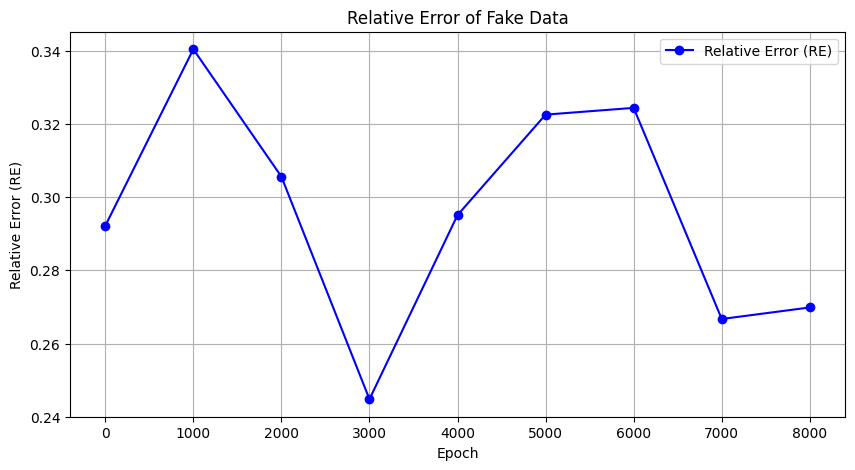

Epoch 0: RE = 0.2922
Epoch 1000: RE = 0.3404
Epoch 2000: RE = 0.3056
Epoch 3000: RE = 0.2448
Epoch 4000: RE = 0.2951
Epoch 5000: RE = 0.3226
Epoch 6000: RE = 0.3244
Epoch 7000: RE = 0.2667
Epoch 8000: RE = 0.2699

✅ Fake Data가 학습됨에 따라 RE가 감소하고 있음 → GAN이 실제 데이터를 더 잘 학습하고 있음!


In [228]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ✅ Fake Data 경로 목록 (1000 epoch ~ 10000 epoch)
epoch_list = list(range(0, 9000, 1000))  # 1000부터 10000까지 1000 단위
fake_data_files = [f"final_fake_data_epoch_0217_{epoch}.pt" for epoch in epoch_list]

# ✅ GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Compute PnL for Real Data (고정값)
real_PNL = torch.tensor(real, dtype=torch.float32).to(device)
real_pnl = Compute_PNL(real_PNL)

# ✅ Compute VaR & ES for Real Data
real_VaR, real_ES = compute_var_es(real_pnl)

# ✅ RE 저장 리스트
re_values = []

# ✅ 각 Fake Data 불러와서 RE 계산
for file in fake_data_files:
    print(f"Processing {file}...")
    
    # 🔹 Fake Data 불러오기
    fake_PNL = torch.tensor(torch.load(file), dtype=torch.float32).to(device)
    
    # 🔹 Compute PnL for Fake Data
    fake_pnl = Compute_PNL(fake_PNL)
    
    # 🔹 Compute VaR & ES for Fake Data
    fake_VaR, fake_ES = compute_var_es(fake_pnl)

    # 🔹 Compute RE (Relative Error)
    RE = compute_relative_error(real_VaR, fake_VaR, real_ES, fake_ES)
    re_values.append(RE.mean().item())  # 평균값 저장

# ✅ Epoch별 RE 변화 시각화
plt.figure(figsize=(10, 5))
plt.plot(epoch_list, re_values, marker='o', linestyle='-', color='b', label="Relative Error (RE)")
plt.xlabel("Epoch")
plt.ylabel("Relative Error (RE)")
plt.title("Relative Error of Fake Data")
plt.legend()
plt.grid(True)
plt.show()

# ✅ RE 값 출력
for epoch, re_value in zip(epoch_list, re_values):
    print(f"Epoch {epoch}: RE = {re_value:.4f}")

# ✅ Interpretation
if re_values[-1] <= re_values[0]:
    print("\n✅ Fake Data가 학습됨에 따라 RE가 감소하고 있음 → GAN이 실제 데이터를 더 잘 학습하고 있음!")
else:
    print("\n⚠️ Fake Data가 학습됨에 따라 RE가 증가하고 있음 → GAN이 실제 데이터를 제대로 학습하지 못하고 있음!")


Distribution: Normal Distribution
Data (first 10 values): [ 0.         -0.0275059   0.00877086 -0.00235996  0.00019731  0.02041581
 -0.01828907 -0.00989221  0.01609272 -0.02076346]
Data Shape: (100,)
--------------------------------------------------
Distribution: AR(1) with phi1=0.5
Data (first 10 values): [ 0.          0.00941478  0.0409627   0.01983935  0.02817838  0.02275889
  0.00608573  0.00453817 -0.00544655 -0.0049517 ]
Data Shape: (100,)
--------------------------------------------------
Distribution: AR(1) with phi2=-0.5
Data (first 10 values): [ 0.          0.01946413  0.0178899  -0.01912766  0.01766183  0.00905952
 -0.01373422  0.00024997  0.0149707  -0.01451912]
Data Shape: (100,)
--------------------------------------------------
Distribution: GARCH(1,1) with 5
Data (first 10 values): [ 0.          0.00435348  0.02352458  0.01042104 -0.00944909  0.00066533
 -0.00245974  0.01800894 -0.00187423 -0.00037502]
Data Shape: (100,)
------------------------------------------------

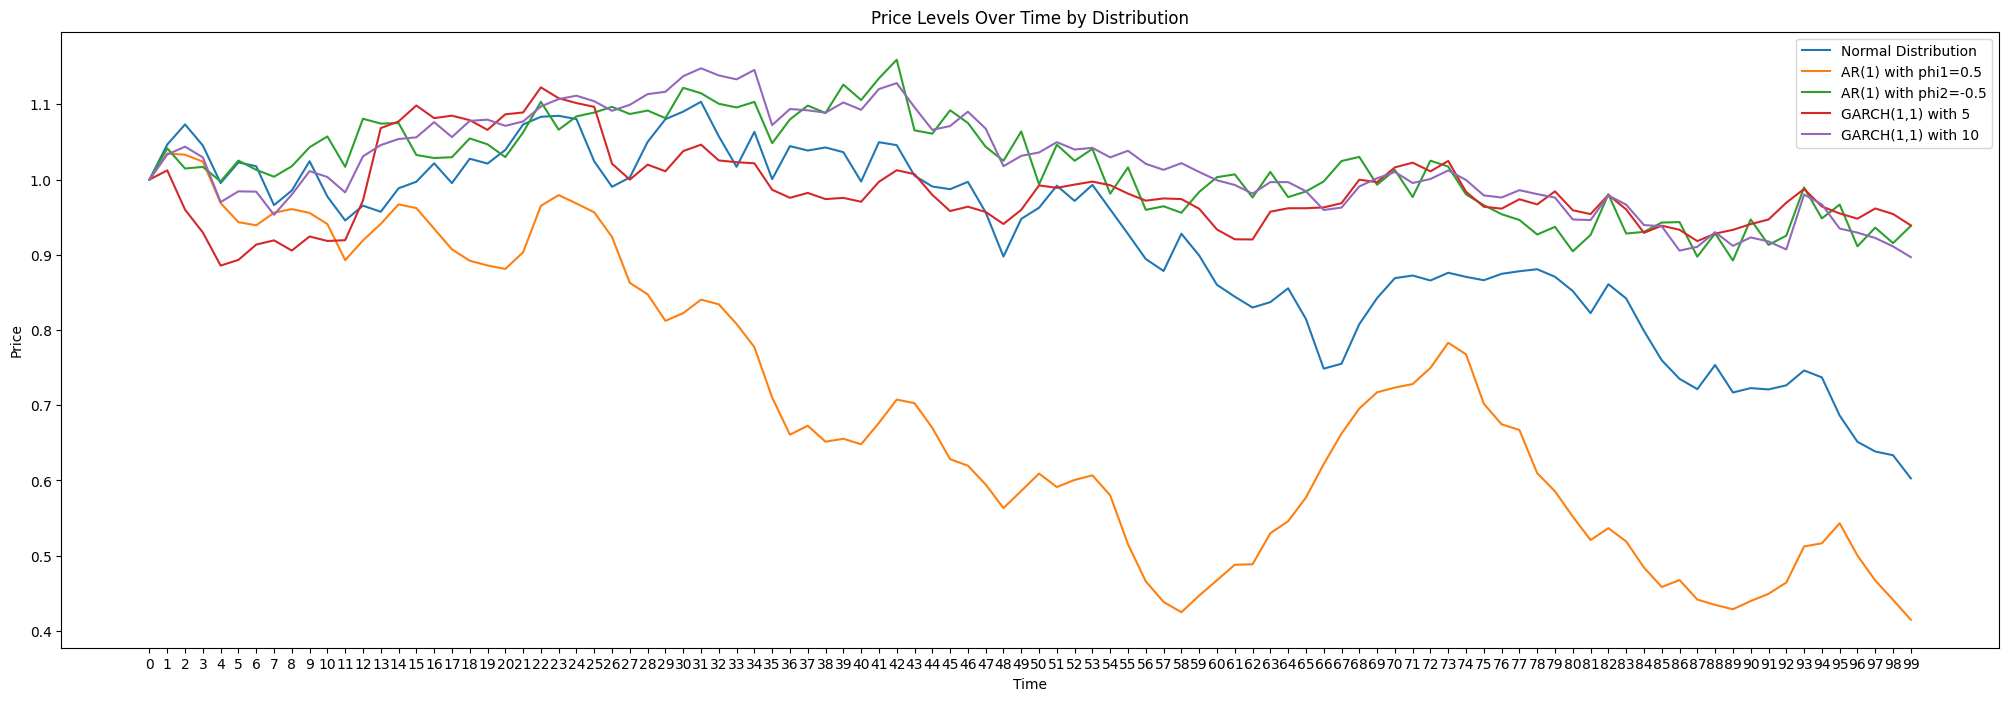

torch.Size([20000, 5, 200])


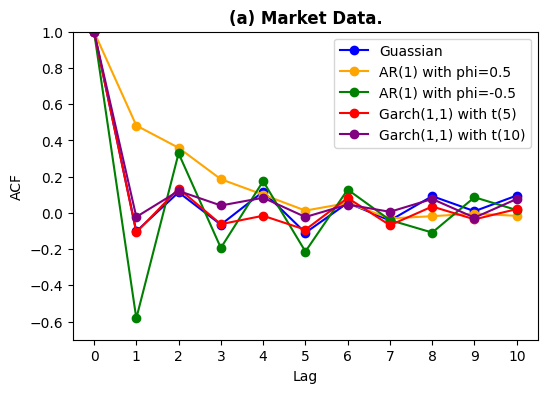

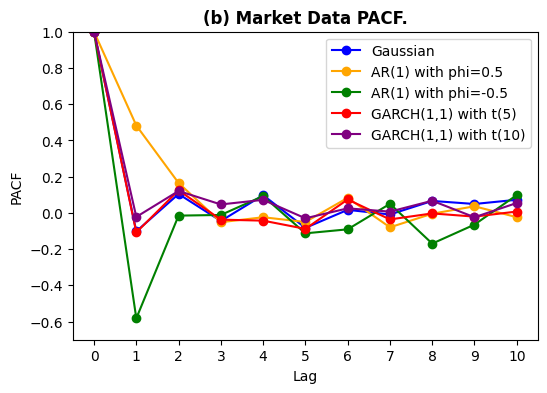

In [205]:
import nbformat

# 실행할 Notebook 파일 이름 (같은 디렉토리에 있어야 함)
notebook_filename = "Dataset_real.ipynb"

# .ipynb 파일 로드
with open(notebook_filename, 'r', encoding="utf-8") as f:
    notebook = nbformat.read(f, as_version=4)
    
# Notebook의 모든 코드 셀을 실행
for cell in notebook.cells:
    if cell.cell_type == 'code':  # 코드 셀만 실행
        exec(cell.source)

In [206]:
import torch
import numpy as np

# ✅ GPU 사용 설정 (CUDA가 없으면 CPU 사용)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 배치 크기 설정


# 각 배치에 대해 같은 분포에서 새로운 데이터 생성
data_list = []
for _ in range(10000):
    data_dict = generate_synthetic_data_real(T=200, phi1=0.5, phi2=-0.5, nu1=5, nu2=10)
    data_values = list(data_dict.values())  # 리스트로 변환
    data_list.append(data_values)  # 리스트에 추가

# (1000, 5, 100) 형태로 변환 + ✅ GPU로 이동
OOS = torch.tensor(data_list, dtype=torch.float32).to(device)  

print(OOS.shape)  # 출력: torch.Size([1000, 5, 100])



torch.Size([10000, 5, 200])


In [252]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# ✅ GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ 랜덤 샘플링 (1000개 선택)
sample_indices_real = np.random.choice(real.shape[0], size=1000, replace=False)
sample_indices_OOS = np.random.choice(OOS.shape[0], size=1000, replace=False)

# ✅ 샘플링된 데이터로 변환
sampled_real = real[sample_indices_real]
sampled_OOS = OOS[sample_indices_OOS]

# ✅ Compute PnL for Sampled Real, Fake, and Sampled OOS
real_PNL = torch.tensor(sampled_real, dtype=torch.float32).to(device)
fake_PNL = torch.tensor(fake, dtype=torch.float32).to(device)  # Fake는 원래 (1000,5,200)이므로 그대로 사용
OOS_PNL = torch.tensor(sampled_OOS, dtype=torch.float32).to(device)

real_pnl = Compute_PNL(real_PNL)
fake_pnl = Compute_PNL(fake_PNL)
OOS_pnl = Compute_PNL(OOS_PNL)

# ✅ Compute VaR & ES for Sampled Real, Fake, and Sampled OOS
real_VaR, real_ES = compute_var_es(real_pnl)
fake_VaR, fake_ES = compute_var_es(fake_pnl)
OOS_VaR, OOS_ES = compute_var_es(OOS_pnl)

# ✅ Compute RE (Relative Error) for Sampled Real vs Sampled OOS
RE_real_OOS = compute_relative_error(OOS_VaR, real_VaR, OOS_ES, real_ES) * 100  # 퍼센트 변환
mean_RE_real_OOS = RE_real_OOS.mean()
std_RE_real_OOS = RE_real_OOS.std()

# ✅ Compute RE (Relative Error) for Fake vs Sampled OOS
RE_fake_OOS = compute_relative_error(OOS_VaR, fake_VaR, OOS_ES, fake_ES) * 100  # 퍼센트 변환
mean_RE_fake_OOS = RE_fake_OOS.mean()
std_RE_fake_OOS = RE_fake_OOS.std()

# ✅ Print Results
print(f"Relative Error (RE) between Sampled Real and Sampled OOS:")
print(f"Mean: {mean_RE_real_OOS:.4f}% | Std Dev: {std_RE_real_OOS:.4f}%\n")

print(f"Relative Error (RE) between Fake and Sampled OOS:")
print(f"Mean: {mean_RE_fake_OOS:.4f}% | Std Dev: {std_RE_fake_OOS:.4f}%\n")

# ✅ Interpretation
if mean_RE_fake_OOS <= mean_RE_real_OOS:
    print("✅ Fake Data가 Real Data만큼 OOS를 잘 추적하고 있음!")
else:
    print("⚠️ Fake Data가 OOS를 잘 따라가지 못하고 있음!")


Relative Error (RE) between Sampled Real and Sampled OOS:
Mean: 3.1142% | Std Dev: 1.3254%

Relative Error (RE) between Fake and Sampled OOS:
Mean: 23.6349% | Std Dev: 6.2649%

⚠️ Fake Data가 OOS를 잘 따라가지 못하고 있음!


C:\Users\A\AppData\Local\Temp\ipykernel_27396\3128409214.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_PNL = torch.tensor(sampled_real, dtype=torch.float32).to(device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3128409214.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  OOS_PNL = torch.tensor(sampled_OOS, dtype=torch.float32).to(device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3049174747.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Cap = torch.tensor(Cap, dtype=torch.float32, device=device)
C:\Users\A\AppDa

In [210]:
def G1(v):
    return v.to(v.device)  # ✅ GPU에서 연산 보장

def G2(e, scale=1):
    return (scale * torch.exp(e / scale)).to(e.device)  # ✅ GPU에서 연산 보장

def G2in(e, scale=1):
    return (scale ** 2 * torch.exp(e / scale)).to(e.device)  # ✅ GPU에서 연산 보장

def G1_quant(v, W=10.0):
    return (- W * v ** 2 / 2).to(v.device)  # ✅ GPU에서 연산 보장

def G2_quant(e, alpha):
    return (alpha * e).to(e.device)  # ✅ GPU에서 연산 보장

def G2in_quant(e, alpha):
    return (alpha * e ** 2 / 2).to(e.device)  # ✅ GPU에서 연산 보장

def S_stats(v, e, X, alpha):
    """
    For a given quantile, here named alpha, calculate the score function value
    """
    device = v.device  # ✅ 입력 데이터 `v`가 위치한 장치를 기준으로 GPU/CPU 설정

    if alpha < 0.5:
        rt = ((X <= v).float() - alpha).to(device) * (G1(v) - G1(X)) + \
             (1. / alpha * G2(e)).to(device) * (X <= v).float().to(device) * (v - X) + \
             G2(e).to(device) * (e - v) - G2in(e)
    else:
        alpha_inverse = 1 - alpha
        rt = ((X >= v).float() - alpha_inverse).to(device) * (G1(X) - G1(v)) + \
             (1. / alpha_inverse * G2(-e)).to(device) * (X >= v).float().to(device) * (X - v) + \
             G2(-e).to(device) * (v - e) - G2in(-e)
    
    return torch.mean(rt).to(device)  # ✅ GPU에서 반환

'''
alpha=0.05이므로 if문 수식만 사용
'''
def S_quant(v, e, X, alpha, W=10.0):
    """
    For a given quantile, here named alpha, calculate the score function value
    """
    device = v.device  # ✅ 입력 데이터 `v`가 위치한 장치를 기준으로 GPU/CPU 설정

    if alpha < 0.5:
        rt = ((X <= v).float() - alpha).to(device) * (G1_quant(v, W) - G1_quant(X, W)) + \
             (1. / alpha * G2_quant(e, alpha)).to(device) * (X <= v).float().to(device) * (v - X) + \
             G2_quant(e, alpha).to(device) * (e - v) - G2in_quant(e, alpha)
    else:
        alpha_inverse = 1 - alpha
        rt = ((X >= v).float() - alpha_inverse).to(device) * (G1_quant(v, W) - G1_quant(X, W)) + \
             (1. / alpha_inverse * G2_quant(-e, alpha_inverse)).to(device) * (X >= v).float().to(device) * (X - v) + \
             G2_quant(-e, alpha_inverse).to(device) * (v - e) - G2in_quant(-e, alpha_inverse)
    
    return torch.mean(rt).to(device)  # ✅ GPU에서 반환


import torch
import torch.nn as nn

class Score(nn.Module):
    def __init__(self):
        super(Score, self).__init__()
        self.alphas = [0.05]
        self.score_name = 'quant'
        self.score_alpha = S_quant  # ✅ GPU에서 실행되도록 설정

    def forward(self, PNL_validity, PNL):
        device = PNL_validity.device  # ✅ 입력 데이터의 장치를 기준으로 GPU/CPU 설정
        loss_per_strategy = []  # 각 전략별 Score 값을 저장할 리스트

        for i, alpha in enumerate(self.alphas):
            for strategy in range(PNL_validity.shape[0]):  # ✅ 65개 전략에 대해 반복
                PNL_var = PNL_validity[strategy, 2 * i].to(device)  # ✅ 전략별 VaR 값
                PNL_es = PNL_validity[strategy, 2 * i + 1].to(device)  # ✅ 전략별 ES 값
                score_value = self.score_alpha(PNL_var, PNL_es, PNL[:, strategy].to(device), alpha).to(device)
                loss_per_strategy.append(score_value)  # ✅ 전략별 Score 저장

        return torch.stack(loss_per_strategy, dim=0)  # ✅





In [211]:
def deterministic_NeuralSort(s, tau):
    """
    s: input elements to be sorted. Shape: batch_size x n x 1
    tau: temperature for relaxation. Scalar.
    """
    device = s.device  # ✅ 입력 데이터 `s`가 위치한 장치를 기준으로 GPU/CPU 설정
    n = s.shape[1]  # ✅ n 값 자동 계산 (batch_size, n, 1)

    one = torch.ones((n, 1), dtype=torch.float32, device=device)  # ✅ GPU에서 생성
    A_s = torch.abs(s - s.permute(0, 2, 1)).to(device)  # ✅ GPU 연산 보장
    B = torch.matmul(A_s, torch.matmul(one, one.T)).to(device)  # ✅ GPU 연산
    scaling = (n + 1 - 2 * (torch.arange(n, dtype=torch.float32, device=device) + 1))  # ✅ GPU에서 생성
    C = torch.matmul(s, scaling.unsqueeze(0)).to(device)  # ✅ GPU 연산
    P_max = (C - B).permute(0, 2, 1).to(device)  # ✅ GPU 연산
    sm = torch.nn.Softmax(dim=-1)
    P_hat = sm(P_max / tau)  # ✅ GPU에서 연산 보장

    return P_hat  # ✅ GPU에서 반환



In [212]:
import torch
import torch.nn as nn


class Discriminator(nn.Module):
    def __init__(self, batch_size, W, alphas, project=True):
        super(Discriminator, self).__init__()

        self.W = 10.0  # Weight Factor
        self.project = True  # Project 적용 여부
        self.alphas = [0.05]  # Tail quantile 기준 값들

        # ✅ 모델이 GPU에서 실행될 수 있도록 설정
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

        # 신경망 모델 정의
        self.model = nn.Sequential(
            nn.Linear(1000, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(128, 2 * len(alphas)),  # Tail quantile 관련 출력
        ).to(self.device)  # ✅ 모델을 GPU로 이동

    def project_op(self, validity):
        """
        Project operation 적용하여 validity 변환
        """
        validity = validity.to(self.device)  # ✅ GPU에서 연산 보장
        for i, alpha in enumerate(self.alphas):
            v = validity[:, 2 * i].clone()
            e = validity[:, 2 * i + 1].clone()
            indicator = torch.sign(torch.tensor(0.5 - alpha, device=self.device))

            validity[:, 2 * i] = indicator * (
                (self.W * v < e).float() * v
                + (self.W * v >= e).float() * (v + self.W * e) / (1 + self.W ** 2)
            )
            validity[:, 2 * i + 1] = indicator * (
                (self.W * v < e).float() * e
                + (self.W * v >= e).float() * self.W * (v + self.W * e) / (1 + self.W ** 2)
            )
        return validity

    def forward(self, R):
        R = R.to(self.device)  # ✅ 입력 데이터를 GPU에서 처리
        PNL = Compute_PNL(R).to(self.device)  # ✅ GPU에서 실행 보장
        PNL_transpose = PNL.T.to(self.device)  # ✅ GPU에서 연산 보장
        PNL_s = PNL_transpose.reshape(*PNL_transpose.shape, 1).to(self.device)  # ✅ GPU에서 실행
        perm_matrix = deterministic_NeuralSort(PNL_s, 0.01).to(self.device)  # ✅ GPU에서 실행
        PNL_sort = torch.bmm(perm_matrix, PNL_s).to(self.device)  # ✅ GPU에서 연산
        PNL_validity = self.model(PNL_sort.reshape(*PNL_transpose.shape)).to(self.device)  # ✅ 모델 실행

        if self.project:
            PNL_validity = self.project_op(PNL_validity)  # ✅ GPU에서 실행 보장
        

        return PNL, PNL_validity  # ✅ GPU에서 반환



In [226]:
import torch
import numpy as np
from scipy.stats import norm

# ✅ GPU 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Score 함수 및 Discriminator 모델 GPU로 이동
score = Score().to(device)
discriminator = Discriminator(batch_size=1000, W=10.0, alphas=[0.05]).to(device)  # Discriminator 인스턴스 생성

# ✅ Ground Truth 데이터 (5000개 샘플) 생성
gt_indices = np.random.choice(real.shape[0], size=1000, replace=False)  
real_gt = real[gt_indices]  # (5000,5,200)

# ✅ Real 데이터 (1000개 샘플) 생성
real_indices = np.random.choice(real.shape[0], size=1000, replace=False)
real_sampled = real[real_indices]  # (1000,5,200)

# ✅ Fake 데이터는 기존 (1000,5,200) 사용
fake_sampled = fake  # (1000,5,200)

# ✅ 데이터 준비 (numpy → Tensor 변환 및 GPU로 이동)
real_gt_tensor = torch.tensor(real_gt, dtype=torch.float32).to(device)
real_tensor = torch.tensor(real_sampled, dtype=torch.float32).to(device)
fake_tensor = torch.tensor(fake_sampled, dtype=torch.float32).to(device)

# ✅ Discriminator 실행 (각각의 PnL 및 유효성 출력)
PNL_gt, PNL_validity_gt = discriminator(real_gt_tensor)  # Ground Truth 데이터
PNL_real, PNL_validity_real = discriminator(real_tensor)  # Real 데이터
PNL_fake, PNL_validity_fake = discriminator(fake_tensor)  # Fake 데이터

# ✅ Score 값 계산 (각 데이터셋의 평균 Score)
score_gt = score(PNL_validity_gt, PNL_gt) # Ground Truth Score 평균
score_real = score(PNL_validity_real, PNL_real)  # Real Score 평균
score_fake = score(PNL_validity_fake, PNL_fake)


score_gt_mean = score(PNL_validity_gt, PNL_gt).mean().item()  # Ground Truth Score 평균
score_real_mean = score(PNL_validity_real, PNL_real).mean().item()  # Real Score 평균
score_fake_mean = score(PNL_validity_fake, PNL_fake).mean().item()  # Fake Score 평균

# ✅ Score 값 numpy 변환
score_gt=score_gt.detach().cpu().numpy()
score_real=score_real.detach().cpu().numpy()
score_fake=score_fake.detach().cpu().numpy()

# ✅ 표준편차 (Standard Deviation) 계산
sem_gt = np.std(score_gt)  # ddof=1: 표본 표준편차
sem_real = np.std(score_real)
sem_fake = np.std(score_fake)

'''# ✅ 표본 표준오차 (Standard Error) 계산
sem_gt = std_gt / np.sqrt(1000)  # GT 데이터는 5000개 샘플
sem_real = std_real / np.sqrt(1000)  # Real 데이터는 1000개 샘플
sem_fake = std_fake / np.sqrt(1000) 
'''

print(score_real_mean)
print(score_gt_mean)
print(score_fake_mean)



# ✅ T_k 값 계산 (평균 Score 값 기반)
T_k_gt_vs_real = (score_real_mean - score_gt_mean) / np.sqrt((sem_gt**2 + sem_real**2)/65)
T_k_gt_vs_fake = (score_fake_mean - score_gt_mean) / np.sqrt((sem_fake**2 + sem_gt**2)/65)

# ✅ p-value 계산 (T_k를 표준 정규분포와 비교)
p_value_gt_vs_real = 2 * (1 - norm.cdf(np.abs(T_k_gt_vs_real)))  # 양측 검정
p_value_gt_vs_fake = 2 * (1 - norm.cdf(np.abs(T_k_gt_vs_fake)))  # 양측 검정

# ✅ 결과 출력
print("\n🔹 Score-based Test Results (GT vs. Real):")
print(f"T_k = {T_k_gt_vs_real:.4f}, p-value = {p_value_gt_vs_real:.4f}")

print("\n🔹 Score-based Test Results (Real vs. Fake):")
print(f"T_k = {T_k_gt_vs_fake:.4f}, p-value = {p_value_gt_vs_fake:.4f}")

# ✅ 최종 해석
print("\n🔍 **결과 해석**")
if p_value_gt_vs_real > 0.05:
    print("✅ GT와 Real 데이터의 T_k 값이 0에 가까움 → Real 데이터는 실제 데이터와 유사함")
else:
    print(f"⚠️ GT와 Real 데이터가 유의미한 차이를 보임 → Real 데이터가 실제 데이터를 잘 반영하지 못할 가능성 있음")

if p_value_gt_vs_fake > 0.05:
    print("✅ Real과 Fake 데이터의 T_k 값이 0에 가까움 → Fake 데이터는 실제 데이터를 잘 따름")
else:
    print(f"⚠️ Real과 Fake 데이터가 유의미한 차이를 보임 → GAN의 성능 개선 필요")


C:\Users\A\AppData\Local\Temp\ipykernel_27396\797140558.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_gt_tensor = torch.tensor(real_gt, dtype=torch.float32).to(device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\797140558.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  real_tensor = torch.tensor(real_sampled, dtype=torch.float32).to(device)
C:\Users\A\AppData\Local\Temp\ipykernel_27396\3049174747.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Cap = torch.tensor(Cap, dtype=torch.float32, device=device)
C:\Users\A\A

4.745846748352051
4.708824157714844
3.5532608032226562

🔹 Score-based Test Results (GT vs. Real):
T_k = 0.0143, p-value = 0.9886

🔹 Score-based Test Results (Real vs. Fake):
T_k = -0.5081, p-value = 0.6114

🔍 **결과 해석**
✅ GT와 Real 데이터의 T_k 값이 0에 가까움 → Real 데이터는 실제 데이터와 유사함
✅ Real과 Fake 데이터의 T_k 값이 0에 가까움 → Fake 데이터는 실제 데이터를 잘 따름
